## Îç∞Ïù¥ÌÑ∞

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q konlpy

In [209]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import sqlite3
import re

from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Í≤ΩÍ≥† Î©îÏãúÏßÄ ÌëúÏãú X
import warnings
warnings.filterwarnings(action='ignore')

In [210]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib-rf # ÏÑ∏ÏÖò Îã§Ïãú ÏãúÏûë

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [211]:
# ÌïúÍ∏ÄÌè∞Ìä∏ÏÑ§Ï†ï
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [212]:
from matplotlib import font_manager as fm
font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [213]:
!pip install -q folium

In [214]:
df_info = pd.read_csv('/content/drive/MyDrive/1_public/markets_data/markets_cleaned.csv', encoding='utf-8-sig') # utf-8

In [215]:
df_info.columns # 2024ÎÖÑ Îç∞Ïù¥ÌÑ∞

Index(['ÏãúÏû•ID', 'ÏãúÏû•Î™Ö', 'ÎèÑÎ°úÎ™ÖÏ£ºÏÜå', 'ÏãúÎèÑ', 'ÏãúÍµ∞Íµ¨', 'ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä', 'ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä',
       'Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä', 'ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä',
       'ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä',
       'ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏãúÏû•Ïú†Ìòï', 'ÏãúÏû•Í∞úÏÑ§Ï£ºÍ∏∞', 'Ï†êÌè¨Ïàò', 'Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä',
       'ÏÇ¨Ïö©Í∞ÄÎä•ÏÉÅÌíàÍ∂å'],
      dtype='object')

In [216]:
df_info.shape

(1388, 23)

In [217]:
df_info.head()

ÏãúÏû•ID      ÏãúÏû•Î™Ö                     ÎèÑÎ°úÎ™ÖÏ£ºÏÜå   ÏãúÎèÑ  ÏãúÍµ∞Íµ¨ ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä  \
0  Í≤ΩÍ∏∞ÎèÑ Í∞ÄÌèâÍµ∞ ÏÑ§ÏïÖÎààÎ©îÍ≥®ÏãúÏû•  ÏÑ§ÏïÖÎààÎ©îÍ≥®ÏãúÏû•   Í≤ΩÍ∏∞ÎèÑ Í∞ÄÌèâÍµ∞ ÏÑ§ÏïÖÎ©¥ Ïã†Ï≤úÏ§ëÏïôÎ°ú 104-1  Í≤ΩÍ∏∞ÎèÑ  Í∞ÄÌèâÍµ∞          N   
1  Í≤ΩÍ∏∞ÎèÑ Í∞ÄÌèâÍµ∞ Í∞ÄÌèâÏû£Í≥†ÏùÑÏãúÏû•  Í∞ÄÌèâÏû£Í≥†ÏùÑÏãúÏû•  Í≤ΩÍ∏∞ÎèÑ Í∞ÄÌèâÍµ∞ Í∞ÄÌèâÏùç Ïû•ÌÑ∞2Í∏∏12  204Ìò∏  Í≤ΩÍ∏∞ÎèÑ  Í∞ÄÌèâÍµ∞          Y   
2   Í≤ΩÍ∏∞ÎèÑ Í∞ÄÌèâÍµ∞ Ï≤≠ÌèâÏó¨Ïö∏ÏãúÏû•   Ï≤≠ÌèâÏó¨Ïö∏ÏãúÏû•       Í≤ΩÍ∏∞ÎèÑ Í∞ÄÌèâÍµ∞ Ï≤≠ÌèâÎ©¥ ÏãúÏû•Ï§ëÏïôÎ°ú19  Í≤ΩÍ∏∞ÎèÑ  Í∞ÄÌèâÍµ∞          Y   
3     Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãú ÏõêÎãπÏãúÏû•     ÏõêÎãπÏãúÏû•  Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãú ÎçïÏñëÍµ¨ Ìò∏Íµ≠Î°ú 790Î≤àÍ∏∏ 17  Í≤ΩÍ∏∞ÎèÑ  Í≥†ÏñëÏãú          Y   
4     Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãú Îä•Í≥°ÏãúÏû•     Îä•Í≥°ÏãúÏû•     Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãú ÎçïÏñëÍµ¨ Îä•Í≥°Î°ú 12Ïùò 9  Í≤ΩÍ∏∞ÎèÑ  Í≥†ÏñëÏãú          N   

  ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä  ... Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä  \
0                 N            N               Y          N  ...          N   
1                 N            Y               Y          Y  ...          N   
2                 Y            N               Y          N  ...          N   
3                 N            Y               Y          Y  ...          Y   
4                 N            Y               Y          N  ...          N   

  ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä   ÏãúÏû•Ïú†Ìòï ÏãúÏû•Í∞úÏÑ§Ï£ºÍ∏∞    Ï†êÌè¨Ïàò  \
0         N          N           Y             N    NaN    NaN    NaN   
1         N          N           Y             N    NaN    NaN    NaN   
2         N          N           Y             N    NaN    NaN    NaN   
3         Y          N           Y             N     ÏÉÅÏÑ§     ÏÉÅÏÑ§   70.0   
4         N          N           N             N  ÏÉÅÏÑ§+Ï†ïÍ∏∞     5Ïùº  120.0   

  Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä ÏÇ¨Ïö©Í∞ÄÎä•ÏÉÅÌíàÍ∂å  
0        NaN     NaN  
1        NaN     NaN  
2        NaN     NaN  
3          N  Ïò®ÎàÑÎ¶¨ÏÉÅÌíàÍ∂å  
4          Y  Ïò®ÎàÑÎ¶¨ÏÉÅÌíàÍ∂å  

[5 rows x 23 columns]

In [218]:
df_rating = pd.read_csv('/content/drive/MyDrive/1_public/markets_data/markets_rating.csv', encoding='utf-8-sig') # utf-8

In [219]:
df_rating['rating'] = df_rating['rating'].str.split('\n').str[-1]
df_rating.head()

mID                                           naverURL rating
0  Í≤ΩÍ∏∞ÎèÑ Í∞ÄÌèâÍµ∞ ÏÑ§ÏïÖÎààÎ©îÍ≥®ÏãúÏû•  https://pcmap.place.naver.com/restaurant/14187...    NaN
1  Í≤ΩÍ∏∞ÎèÑ Í∞ÄÌèâÍµ∞ Í∞ÄÌèâÏû£Í≥†ÏùÑÏãúÏû•  https://pcmap.place.naver.com/restaurant/38738...    NaN
2   Í≤ΩÍ∏∞ÎèÑ Í∞ÄÌèâÍµ∞ Ï≤≠ÌèâÏó¨Ïö∏ÏãúÏû•  https://pcmap.place.naver.com/restaurant/11536...    NaN
3     Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãú ÏõêÎãπÏãúÏû•  https://pcmap.place.naver.com/restaurant/32892...   3.77
4     Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãú Îä•Í≥°ÏãúÏû•  https://pcmap.place.naver.com/restaurant/16192...    NaN

In [220]:
df_rating = df_rating.rename(columns={'mID': 'ÏãúÏû•ID'})

In [221]:
# Î≥ëÌï©
df_merge = pd.merge(
    df_info,
    df_rating[['ÏãúÏû•ID', 'naverURL', 'rating']],  # ÌïÑÏöîÌïú Ïó¥Îßå ÏÑ†ÌÉù
    how='left',
    on='ÏãúÏû•ID',
)

In [222]:
# naverURL ÎπÑÏñ¥ÏûàÏúºÎ©¥ ÏÇ≠Ï†ú 1388 -> 1296
df_merge = df_merge[df_merge['naverURL'].notna() & (df_merge['naverURL'] != "")]
df_merge.shape

(1296, 25)

In [223]:
# df_merge.to_csv('/content/drive/MyDrive/1_public/markets_data/markets_info_final.csv', encoding='utf-8-sig', index=False)
# df_merge.shape

In [201]:
df_review = pd.read_csv('/content/drive/MyDrive/1_public/markets_data/markets_reviews_final.csv', encoding='utf-8-sig') # utf-8
df_review.shape

(21125, 3)

In [202]:
df_review.columns

Index(['mID', 'rate', 'review'], dtype='object')

---

# 1. 1289Í∞úÏùò ÏãúÏû• Î¶¨Î∑∞ Í∏ç/Î∂ÄÏ†ï ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú


In [27]:
df_review.columns

Index(['mID', 'rate', 'review'], dtype='object')

In [28]:
# review ÏπºÎüº NullÏù∏ ÏÉòÌîå Ï†úÍ±∞
df_review = df_review[df_review['review'].notnull()]

In [29]:
df_review.shape

(20419, 3)

In [30]:
# ÏòàÏãú: Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ Îì±ÏùÄ ÎÇòÏ§ëÏóê Ï∂îÍ∞Ä
def clean_text(text):
    text = re.sub(r'[^Í∞Ä-Ìû£\s]', '', str(text))  # ÌïúÍ∏ÄÍ≥º Í≥µÎ∞±Îßå ÎÇ®ÍπÄ
    text = re.sub(r'\s+', ' ', text).strip()     # Í≥µÎ∞± Ï†ïÎ¶¨
    return text

df_review['clean_review'] = df_review['review'].apply(clean_text)

In [31]:
# Í∞êÏ†ï ÏÇ¨Ï†Ñ
positive_words = [
    'ÎßõÏûà', 'ÏπúÏ†à', 'ÍπîÎÅî', 'Ï¢ã', 'Ìé∏Ìïò', 'Ïû¨Î∞å', 'ÌñâÎ≥µ', 'ÏπúÍ∑º', 'ÎßåÏ°±', 'Ï∂îÏ≤ú', 'ÌõåÎ•≠', 'Íπ®ÎÅó',
    'Ïã†ÏÑ†', 'ÏôÑÎ≤Ω', 'ÏµúÍ≥†', 'Í∞êÎèô', 'ÎÜÄÎùºÏö¥', 'ÌÉÅÏõî', 'Ïö∞Ïàò', 'Îõ∞Ïñ¥ÎÇú', 'ÌôòÏÉÅÏ†Å', 'Î©ãÏßÑ'
]

negative_words = [
    'Î∂àÏπúÏ†à', 'ÎçîÎüΩ', 'ÏãúÎÅÑÎüΩ', 'ÏßúÏ¶ù', 'Î≥ÑÎ°ú', 'Î∂àÌé∏', 'ÎπÑÏã∏', 'Î∂àÎßå', 'ÎÇòÏÅò', 'ÌûòÎì§', 'ÏßÄÎ£®',
    'Ïã§Îßù', 'ÏµúÏïÖ', 'ÎÅîÏ∞ç', 'ÌòïÌé∏ÏóÜ', 'ÌôîÎÇò', 'ÎãµÎãµ', 'ÏßúÏ¶ùÎÇò', 'Í∑ÄÏ∞Æ', 'Ïä§Ìä∏Î†àÏä§'
]

def get_sentiment(text):
    pos_score = sum(word in text for word in positive_words)
    neg_score = sum(word in text for word in negative_words)
    if pos_score > neg_score:
        return 'positive'
    elif pos_score < neg_score:
        return 'negative'
    else:
        return 'neutral'

df_review['sentiment'] = df_review['clean_review'].apply(get_sentiment)

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

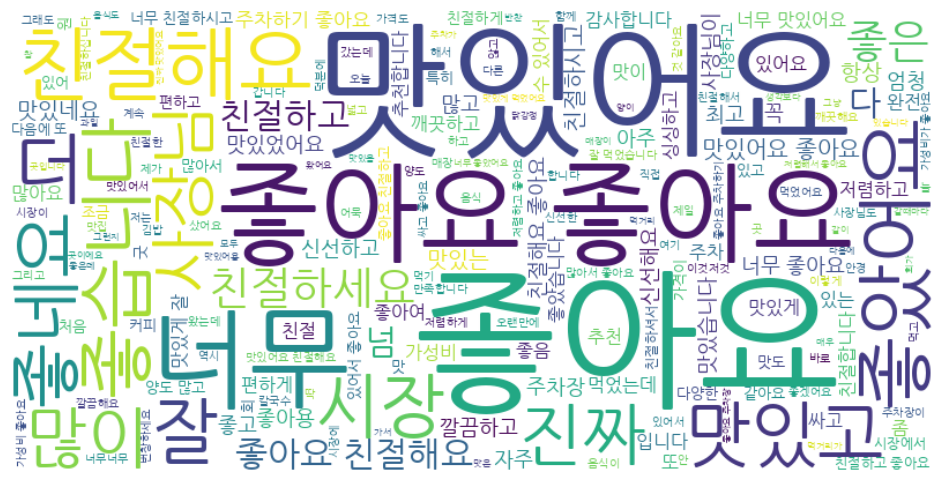

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Í∏çÏ†ï Î¶¨Î∑∞ Î™®ÏïÑ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
pos_text = ' '.join(df_review[df_review['sentiment'] == 'positive']['clean_review'])
neg_text = ' '.join(df_review[df_review['sentiment'] == 'negative']['clean_review'])

wordcloud_pos = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                          background_color='white', width=800, height=400,
                          stopwords={'Ï¢ãÏïÑ', 'Ï†ïÎßê'}).generate(pos_text)

wordcloud_neg = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                          background_color='white', colormap='Reds', width=800, height=400,
                          stopwords={'ÏôÄÏÑúÎ®πÎã§Í∞Ä'}).generate(neg_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')

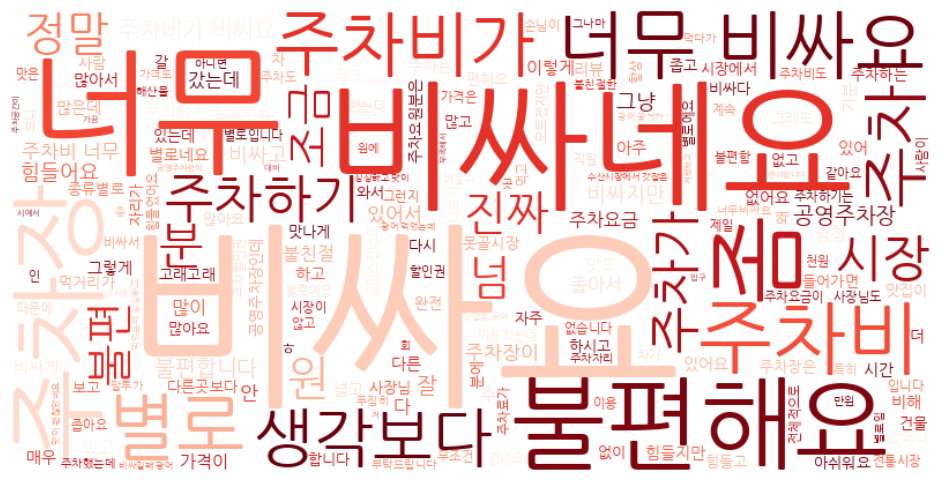

In [17]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

# 2. ÏàòÎèÑÍ∂å/ÏßÄÎ∞© ÏãúÏû• Î¶¨Î∑∞ Í∏ç/Î∂ÄÏ†ï ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
> - Í≤ΩÍ∏∞ÎèÑ, ÏÑúÏö∏, Ïù∏Ï≤ú
> - ÎÇòÎ®∏ÏßÄ ÏßÄÎ∞©
> - TF-IDF ÏÉÅÏúÑÎã®Ïñ¥Îßå Ï∂îÏ∂úÌï¥ÏÑú ÎπÑÍµê
> - ÏàòÎèÑÍ∂å ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÏóê ÏûàÎäî Îã®Ïñ¥Îäî ÏàòÎèÑÍ∂åÏóêÏÑú ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îçî Ï§ëÏöîÌïòÍ≤å Ïñ∏Í∏âÎêú Îã®Ïñ¥
> - ÏßÄÎ∞© ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎäî ÏßÄÎ∞© ÏãúÏû•ÏóêÏÑúÏùò ÌäπÏßïÏ†ÅÏù∏ Îã®Ïñ¥Î•º Î≥¥Ïó¨Ï§å
> - Í≥µÌÜµ Îã®Ïñ¥Îäî ÏûêÎèôÏúºÎ°ú Ï†úÏô∏ÎêòÍ±∞ÎÇò Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÍ≤å Ï≤òÎ¶¨Îê®

## TF-IDF
> - Î¶¨Î∑∞Î•º ÌòïÌÉúÏÜå Î∂ÑÏÑù ÌõÑ Î¨∏ÏÑúÌôî
> - TF-IDF Í≥ÑÏÇ∞
> - ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±

## Í≥µÌÜµÏ†êÍ≥º Ï∞®Ïù¥Ï†ê
| Íµ¨Î∂Ñ      | Ìï¥ÏÑù                                       |
| ------- | ---------------------------------------- |
| **ÏàòÎèÑÍ∂å** | ÏÉùÌôúÎ∞ÄÏ∞©Ìòï ÏãúÏû•, Ï£ºÍ∏∞Ï†Å Î∞©Î¨∏, Í∞ÄÍ≤©¬∑Ï£ºÏ∞® Ïô∏Ïóê ÏπúÍ∑ºÍ∞ê/ÎßåÏ°±ÎèÑ Ï§ëÏã¨ Î¶¨Î∑∞ |
| **ÏßÄÎ∞©**  | Í¥ÄÍ¥ëÏßÄÌòï ÏãúÏû•, ÍµêÌÜµÍ≥º Í¥ÄÎ†®Îêú Ïñ∏Í∏â, Íµ¨Í≤ΩÍ±∞Î¶¨¬∑Í±∞Î¶¨Í∞êÏóê ÎåÄÌïú Ïñ∏Í∏â     |

‚ú® ÏàòÎèÑÍ∂å ÌäπÏù¥ Îã®Ïñ¥

ÏûêÏ£º:
‚Üí ÏàòÎèÑÍ∂å ÏãúÏû•ÏùÄ ÏÉùÌôúÍ∂åÏóê Í∞ÄÍπåÏõå Î∞òÎ≥µ Î∞©Î¨∏ÌïúÎã§Îäî Ïù∏ÏÉÅÏùÑ Ï§å
‚Üí Ïòà: "Ïßë ÏïûÏù¥Îùº ÏûêÏ£º Í∞ÄÏöî", "Ï£ºÎßêÎßàÎã§ ÏûêÏ£º Îì§Îü¨Ïöî"

ÏßÑÏßú:
‚Üí Í∞êÌÉÑÏÇ¨, Í∞ïÏ°∞ ÌëúÌòÑÏúºÎ°ú ÏπúÏàôÌï®Ïù¥ÎÇò ÎßåÏ°±ÎèÑÎ•º ÌëúÌòÑ
‚Üí Ïòà: "ÏßÑÏßú Ïã∏Ïöî", "ÏßÑÏßú ÏπúÏ†àÌï®"

üß≥ ÏßÄÎ∞© ÌäπÏù¥ Îã®Ïñ¥

Íµ¨Í≤Ω:
‚Üí Í¥ÄÍ¥ë Î™©Ï†ÅÏùò ÏãúÏû• Î∞©Î¨∏. Ïó¨ÌñâÍ∞ù Ï§ëÏã¨ Î¶¨Î∑∞
‚Üí Ïòà: "Íµ¨Í≤ΩÌï† Í≤ÉÎèÑ ÎßéÍ≥† Ïû¨Î∞åÏñ¥Ïöî", "Î≥ºÍ±∞Î¶¨ ÎßéÏïÑÏÑú Ï¢ãÏïòÏñ¥Ïöî"

Ï∞®ÎπÑ:
‚Üí ÏãúÏû• Ï†ëÍ∑ºÏÑ± Ïñ∏Í∏â. ÍµêÌÜµÎπÑ Î∂ÄÎã¥, Í±∞Î¶¨ Î¨∏Ï†ú
‚Üí Ïòà: "Ï∞®ÎπÑ Îì§Ïó¨ ÏùºÎ∂ÄÎü¨ ÏôîÎäîÎç∞...", "Ï∞®ÎπÑ ÏïÑÍπåÏö¥ ÏãúÏû•ÏùÄ ÏïÑÎãàÏóàÏñ¥Ïöî"




In [33]:
df_info['ÏãúÎèÑ'].unique()

array(['Í≤ΩÍ∏∞ÎèÑ', 'ÏàòÏõêÏãú', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'Ï§ëÍµ¨', 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú', 'Ï∂©Ï≤≠ÎÇ®ÎèÑ',
       'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'Ï†ÑÎùºÎ∂ÅÎèÑ', 'Í≤ΩÏÉÅÎ∂ÅÎèÑ', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', 'Í≤ΩÏÉÅÎÇ®ÎèÑ', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú',
       'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'Í∞ïÏõêÎèÑ', 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ'], dtype=object)

In [34]:
# ÏàòÎèÑÍ∂å ÏãúÎèÑ Î™©Î°ù
capital_region = ['ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'Í≤ΩÍ∏∞ÎèÑ', 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú']

# ÏàòÎèÑÍ∂å Ïó¨Î∂Ä Ïª¨Îüº Ï∂îÍ∞Ä
df_merged = pd.merge(df_info, df_review, left_on='ÏãúÏû•ID', right_on='mID', how='inner')
df_merged['ÏàòÎèÑÍ∂å'] = df_merged['ÏãúÎèÑ'].apply(lambda x: 'ÏàòÎèÑÍ∂å' if x in capital_region else 'ÏßÄÎ∞©')

In [35]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

okt = Okt()

# ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Ìï®Ïàò
def tokenize(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if len(word) > 1]

# ÏàòÎèÑÍ∂å/ÏßÄÎ∞© Î¨∏ÏÑú ÏÉùÏÑ±
capital_reviews = " ".join(df_merged[df_merged['ÏàòÎèÑÍ∂å'] == 'ÏàòÎèÑÍ∂å']['review'].dropna())
local_reviews = " ".join(df_merged[df_merged['ÏàòÎèÑÍ∂å'] == 'ÏßÄÎ∞©']['review'].dropna())

docs = [capital_reviews, local_reviews]

In [36]:
# ÏßÅÏ†ë tokenizer Ìï®Ïàò ÏßÄÏ†ï (Okt ÏÇ¨Ïö©)
vectorizer = TfidfVectorizer(tokenizer=tokenize, max_features=300)
tfidf_matrix = vectorizer.fit_transform(docs)

# Îã®Ïñ¥ÏôÄ Ï†êÏàò Ï∂îÏ∂ú
words = vectorizer.get_feature_names_out()
capital_scores = tfidf_matrix[0].toarray().flatten()
local_scores = tfidf_matrix[1].toarray().flatten()

# ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Ï†ÄÏû•
capital_dict = {word: score for word, score in zip(words, capital_scores)}
local_dict = {word: score for word, score in zip(words, local_scores)}

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

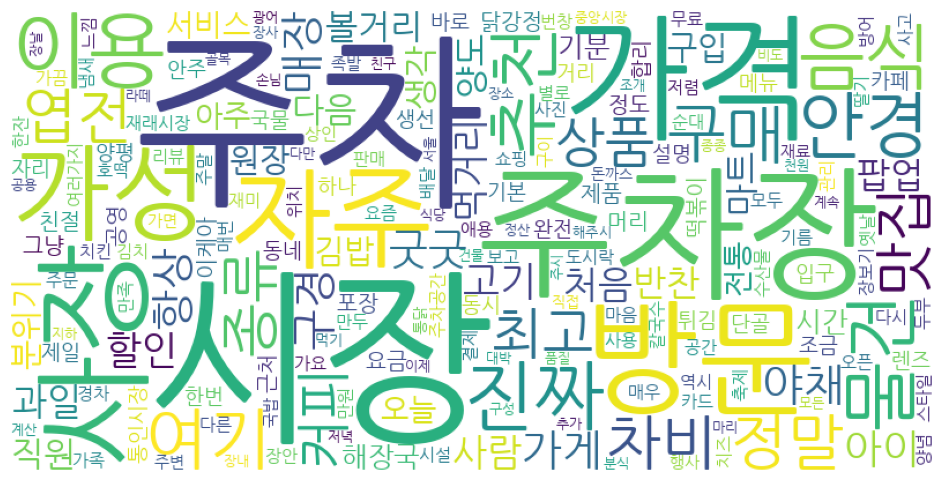

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_capital = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', width=800, height=400, background_color='white')
wordcloud_local = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', width=800, height=400, background_color='white')

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÌëúÏãú
plt.figure(figsize=(14,6))
plt.imshow(wordcloud_capital.generate_from_frequencies(capital_dict))
plt.axis('off')

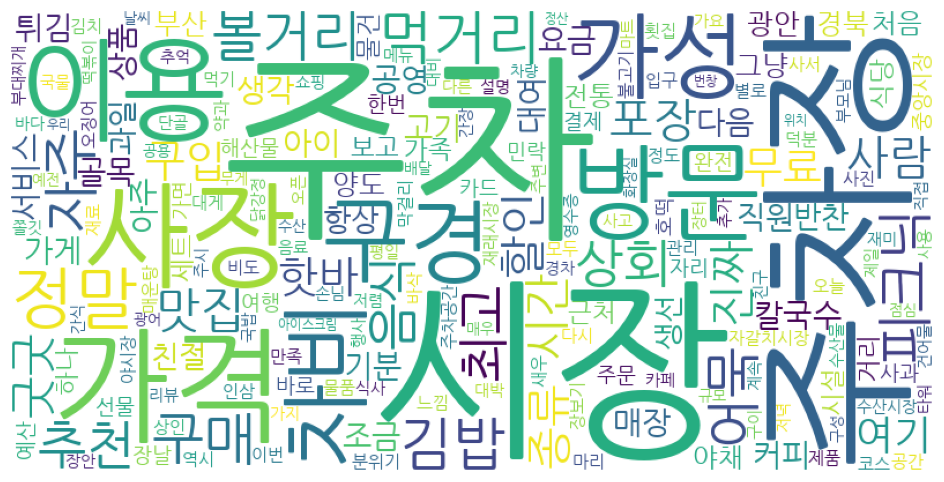

In [39]:
plt.figure(figsize=(14,6))
plt.imshow(wordcloud_local.generate_from_frequencies(local_dict))
plt.axis('off')
plt.show()

In [40]:
# Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞

# ÏàòÎèÑÍ∂å Î¶¨Î∑∞
capital_text = " ".join(df_merged[df_merged['ÏàòÎèÑÍ∂å'] == 'ÏàòÎèÑÍ∂å']['review'].dropna())
capital_nouns = okt.nouns(capital_text)
capital_filtered = [word for word in capital_nouns if len(word) > 1]

# ÏßÄÎ∞© Î¶¨Î∑∞
local_text = " ".join(df_merged[df_merged['ÏàòÎèÑÍ∂å'] == 'ÏßÄÎ∞©']['review'].dropna())
local_nouns = okt.nouns(local_text)
local_filtered = [word for word in local_nouns if len(word) > 1]

capital_counts = Counter(capital_filtered)
local_counts = Counter(local_filtered)

# ÏÉÅÏúÑ 10Í∞ú Îã®Ïñ¥ ÎπÑÍµê
print("‚úÖ ÏàòÎèÑÍ∂å TOP10:", capital_counts.most_common(10))
print("‚úÖ ÏßÄÎ∞© TOP10:", local_counts.most_common(10))

‚úÖ ÏàòÎèÑÍ∂å TOP10: [('ÏãúÏû•', 702), ('Ï£ºÏ∞®', 698), ('Ï£ºÏ∞®Ïû•', 369), ('Í∞ÄÍ≤©', 326), ('Î∞©Î¨∏', 267), ('ÏÇ¨Ïû•', 253), ('ÏûêÏ£º', 203), ('Í∞ÄÏÑ±', 191), ('Ïù¥Ïö©', 184), ('ÏßÑÏßú', 151)]
‚úÖ ÏßÄÎ∞© TOP10: [('Ï£ºÏ∞®', 1151), ('ÏãúÏû•', 1084), ('Ï£ºÏ∞®Ïû•', 730), ('Í∞ÄÍ≤©', 381), ('ÏÇ¨Ïû•', 320), ('Ïù¥Ïö©', 309), ('Î∞©Î¨∏', 257), ('Í∞ÄÏÑ±', 208), ('Íµ¨Í≤Ω', 198), ('Ï∞®ÎπÑ', 196)]


In [42]:
# # ÏàòÎèÑÍ∂å/ÏßÄÎ∞© ÏÉÅÏúÑ 10Í∞ú Îã®Ïñ¥ Í∞ÄÏ†∏Ïò§Í∏∞
# top_capital = capital_counts.most_common(10)
# top_local = local_counts.most_common(10)

# # DataFrameÏúºÎ°ú Î≥ÄÌôò
# df_capital = pd.DataFrame(top_capital, columns=['Îã®Ïñ¥', 'ÏàòÎèÑÍ∂å ÎπàÎèÑ'])
# df_local = pd.DataFrame(top_local, columns=['Îã®Ïñ¥', 'ÏßÄÎ∞© ÎπàÎèÑ'])

# # Îã®Ïñ¥ Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
# df_compare = pd.merge(df_capital, df_local, on='Îã®Ïñ¥', how='outer').fillna(0)

# # ÏãúÍ∞ÅÌôî
# df_compare.set_index('Îã®Ïñ¥').plot(kind='bar', figsize=(12, 6))
# plt.title('ÏàòÎèÑÍ∂å vs ÏßÄÎ∞© Î¶¨Î∑∞ Îã®Ïñ¥ ÎπàÎèÑ TOP10')
# plt.xlabel('Îã®Ïñ¥')
# plt.ylabel('ÎπàÎèÑ Ïàò')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

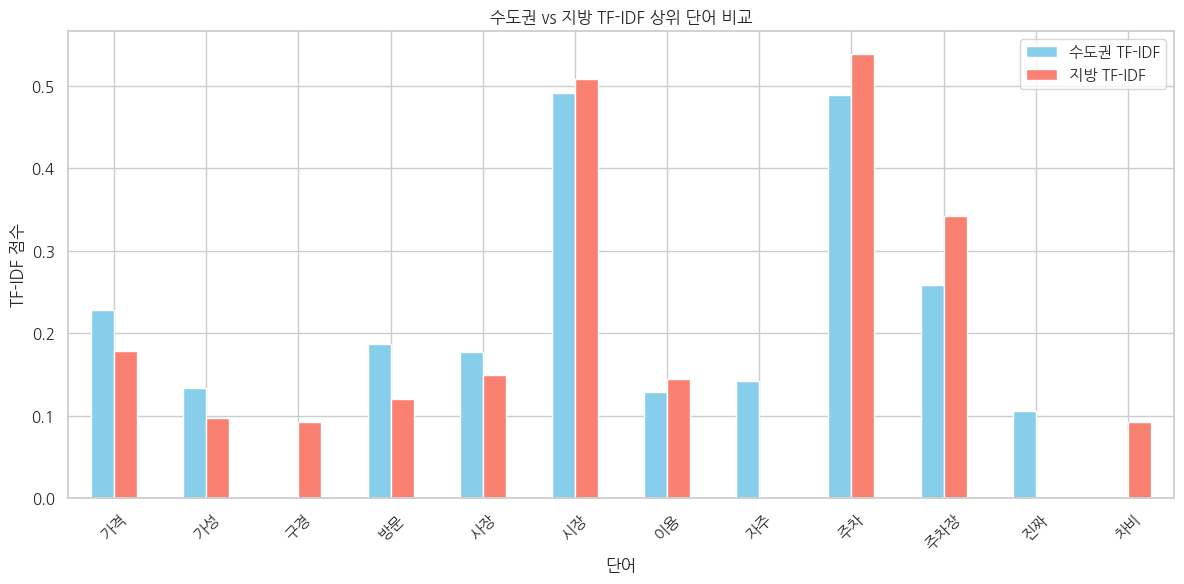

In [46]:
# ÏàòÎèÑÍ∂å/ÏßÄÎ∞© ÏÉÅÏúÑ 10Í∞ú Îã®Ïñ¥ Í∞ÄÏ†∏Ïò§Í∏∞ (TF-IDF Í∏∞Ï§Ä)
top_capital = sorted(capital_dict.items(), key=lambda x: x[1], reverse=True)[:10]
top_local = sorted(local_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# DataFrameÏúºÎ°ú Î≥ÄÌôò
df_capital = pd.DataFrame(top_capital, columns=['Îã®Ïñ¥', 'ÏàòÎèÑÍ∂å TF-IDF'])
df_local = pd.DataFrame(top_local, columns=['Îã®Ïñ¥', 'ÏßÄÎ∞© TF-IDF'])

# Îã®Ïñ¥ Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df_compare = pd.merge(df_capital, df_local, on='Îã®Ïñ¥', how='outer').fillna(0)

# ÏãúÍ∞ÅÌôî
df_compare.set_index('Îã®Ïñ¥').plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('ÏàòÎèÑÍ∂å vs ÏßÄÎ∞© TF-IDF ÏÉÅÏúÑ Îã®Ïñ¥ ÎπÑÍµê')
plt.xlabel('Îã®Ïñ¥')
plt.ylabel('TF-IDF Ï†êÏàò')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 3. ÏãúÏÑ§ Ïú†Î¨¥Î≥Ñ ÎßåÏ°±ÎèÑ Ï∞®Ïù¥ Î∂ÑÏÑù
> - Ïòà: ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞ Î≥¥Ïú† ÏãúÏû• vs ÎØ∏Î≥¥Ïú† ÏãúÏû• Í∞Ñ ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥
> - Ïòà: Ï£ºÏ∞®Ïû• Î≥¥Ïú† ÏãúÏû• vs ÎØ∏Î≥¥Ïú† ÏãúÏû• Í∞Ñ ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥
> - Ïòà: Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú† ÏãúÏû• vs ÎØ∏Î≥¥Ïú† ÏãúÏû• Í∞Ñ ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥
> - Ïòà: Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† ÏãúÏû• vs ÎØ∏Î≥¥Ïú† ÏãúÏû• Í∞Ñ ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥
> - Ïòà: ÏïÑÏºÄÏù¥Îìú vs ÎØ∏Î≥¥Ïú† ÏãúÏû• Í∞Ñ ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥

- Î∂ÑÏÑù Î™©Ï†Å: Ïñ¥Îñ§ ÏãúÏÑ§Ïù¥ Ïã§Ï†úÎ°ú Î¶¨Î∑∞ ÌèâÏ†êÏóê Í∏çÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ ÌôïÏù∏
- Ïòà: Ï£ºÏ∞®Ïû• Î≥¥Ïú† vs ÎØ∏Î≥¥Ïú†, ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† vs ÎØ∏Î≥¥Ïú†.
- Îëê ÏßëÎã®(ÎòêÎäî Îã§Ï§ë ÏßëÎã®)Ïùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïúÏßÄ Í≤ÄÏ†ï ‚Üí ‚ÄúÌà¨Ïûê Ïö∞ÏÑ†ÏàúÏúÑ‚Äù Í∑ºÍ±∞ ÎßàÎ†®.

> - ‚úÖ Ïö©Ïñ¥ Ï†ïÎ¶¨: Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÎûÄ?
‚Üí **‚ÄúÏãúÏÑ§ Î≥¥Ïú† Ïó¨Î∂ÄÏóê Îî∞Îùº ÏãúÏû•Ïùò ÌèâÍ∑† ÌèâÏ†êÏù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÍ≤å Îã§Î•¥Îã§‚Äù**Îäî ÎúªÏûÖÎãàÎã§.
> - Í∑ÄÎ¨¥Í∞ÄÏÑ§ (H‚ÇÄ):
‚Üí ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®(ÎòêÎäî Ïú†ÏïÑÎÜÄÏù¥Î∞©) Î≥¥Ïú† Ïó¨Î∂ÄÏóê Îî∞Îùº ÌèâÏ†êÏóê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.
> - ÎåÄÎ¶ΩÍ∞ÄÏÑ§ (H‚ÇÅ):
‚Üí Î≥¥Ïú† Ïó¨Î∂ÄÏóê Îî∞Îùº ÌèâÏ†êÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎã§.




In [123]:
df_info.columns

Index(['ÏãúÏû•ID', 'ÏãúÏû•Î™Ö', 'ÎèÑÎ°úÎ™ÖÏ£ºÏÜå', 'ÏãúÎèÑ', 'ÏãúÍµ∞Íµ¨', 'ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä', 'ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä',
       'Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä', 'ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä',
       'ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä',
       'ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏãúÏû•Ïú†Ìòï', 'ÏãúÏû•Í∞úÏÑ§Ï£ºÍ∏∞', 'Ï†êÌè¨Ïàò', 'Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä',
       'ÏÇ¨Ïö©Í∞ÄÎä•ÏÉÅÌíàÍ∂å'],
      dtype='object')

In [124]:
df_rating.columns

Index(['ÏãúÏû•ID', 'naverURL', 'rating'], dtype='object')

üîç ÏãúÏÑ§Î™Ö: ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä
   ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0                  0    302  4.320199
1                  1    105  4.281429 



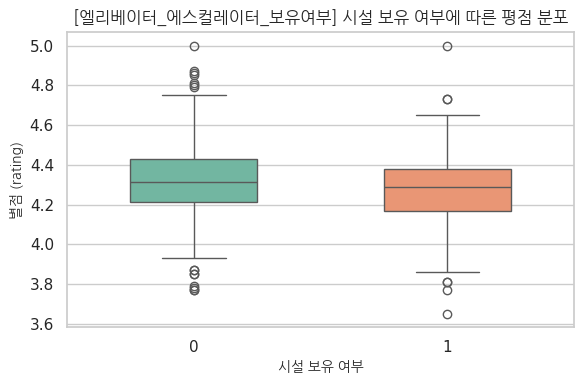

üîç ÏãúÏÑ§Î™Ö: ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä
   ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0                0     53  4.325094
1                1    354  4.307966 



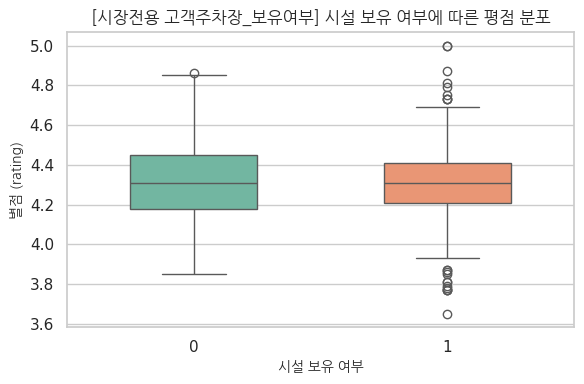

üîç ÏãúÏÑ§Î™Ö: Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä
   Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0         0.0     27  4.345185
1         1.0    304  4.315625 



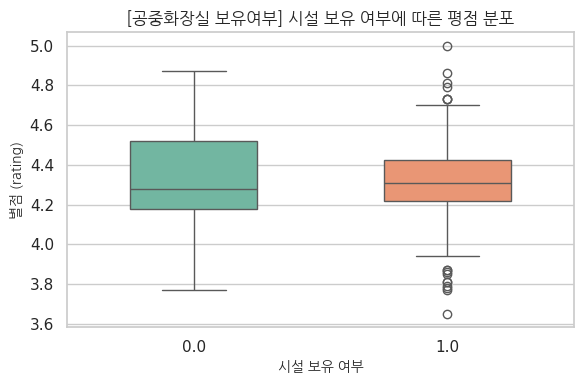

üîç ÏãúÏÑ§Î™Ö: Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä
   Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä  count      mean
0             0     44  4.350455
1             1    363  4.305317 



üîç ÏãúÏÑ§Î™Ö: ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä
   ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä  count      mean
0           0     98  4.344184
1           1    309  4.299417 



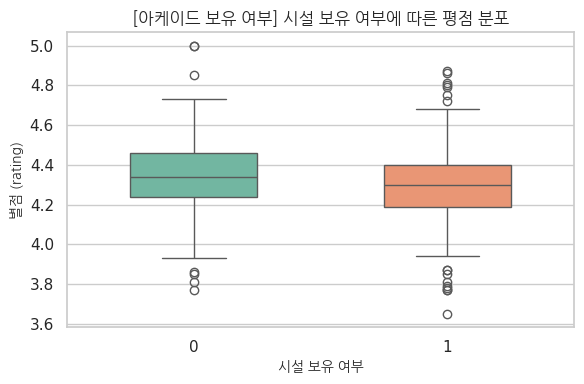

üîç ÏãúÏÑ§Î™Ö: ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä
   ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0            0    208  4.329904
1            1    199  4.289598 



üîç ÏãúÏÑ§Î™Ö: Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä
   Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0              0    359  4.312033
1              1     48  4.296458 



üîç ÏãúÏÑ§Î™Ö: Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä
   Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0           0    299  4.322943
1           1    108  4.274907 



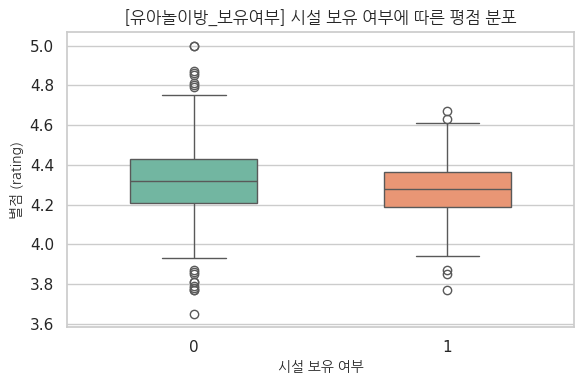

üîç ÏãúÏÑ§Î™Ö: ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä
   ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0          0    284  4.318239
1          1    123  4.291626 



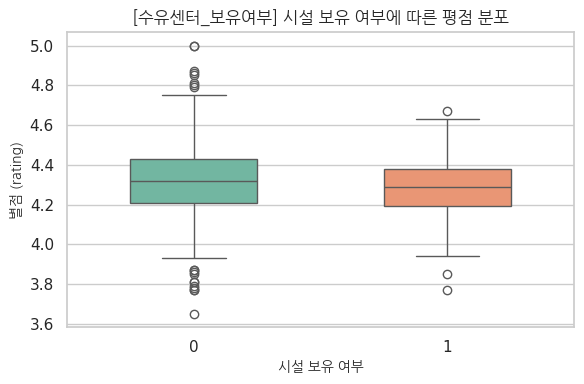

üîç ÏãúÏÑ§Î™Ö: Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä
   Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0           0    276  4.314601
1           1    131  4.300916 



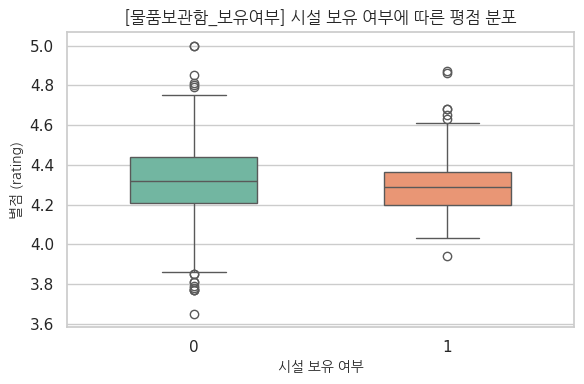

üîç ÏãúÏÑ§Î™Ö: Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä
   Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0           0    195  4.325949
1           1    212  4.295708 



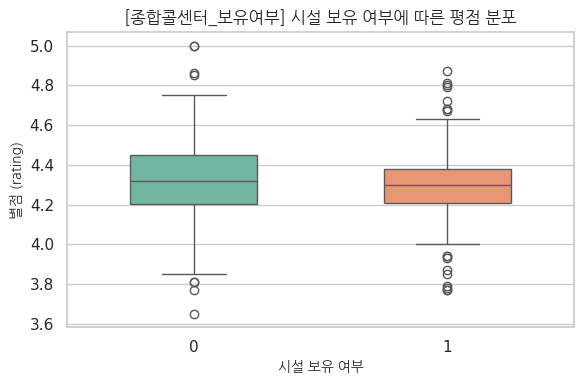

üîç ÏãúÏÑ§Î™Ö: Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä
   Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä  count      mean
0            0    142  4.300915
1            1    265  4.315170 



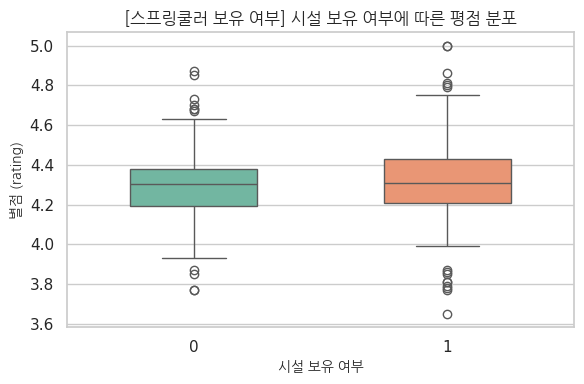

üîç ÏãúÏÑ§Î™Ö: ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä
   ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0           0     31  4.283871
1           1    376  4.312367 



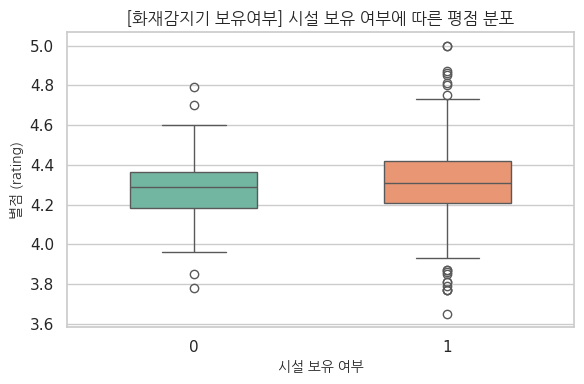

üîç ÏãúÏÑ§Î™Ö: ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä
   ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä  count      mean
0             0    191  4.324764
1             1    216  4.297315 



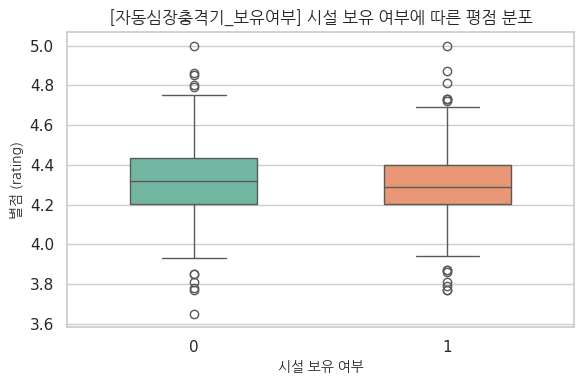

In [125]:
# ÌèâÍ∑† ÌèâÏ†êÏù¥ ÎÜíÏùÄÍ≤å ÌôîÏû¨Í∞êÏßÄÍ∏∞Îûë Ïä§ÌîÑÎßÅÏø®Îü¨
# Ïª¨Îüº Ï†ïÎ¶¨ Î∞è Î≥ëÌï©
df_rating = df_rating[['ÏãúÏû•ID', 'naverURL', 'rating']].copy()
df_rating['rating'] = pd.to_numeric(df_rating['rating'], errors='coerce')  # ratingÏù¥ Î¨∏ÏûêÏó¥Ïù¥Î©¥ ÏàòÏπòÎ°ú Î≥ÄÌôò

# 'ÏãúÏû•ID'ÏôÄ 'mID' Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df_merged = pd.merge(df_info, df_rating, on='ÏãúÏû•ID', how='inner')

# Î∂ÑÏÑùÌï† Ï£ºÏöî ÏãúÏÑ§ Ïª¨ÎüºÎì§ (ÌëúÌòÑ ÏùºÍ¥ÄÏÑ± ÏúÑÌï¥ Ïª¨ÎüºÎ™ÖÏùÑ Î¶¨Ïä§Ìä∏Î°ú ÏàòÎèô ÏûëÏÑ±)
facility_cols = [
    'ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä',
    'ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä',
    'Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä',
    'Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä',
    'ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä',
    'ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä',
    'Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä',
    'Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä',
    'ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä',
    'Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä',
    'Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä',
    'Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä',
    'ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä',
    'ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä',
]

for col in facility_cols:
    print(f"üîç ÏãúÏÑ§Î™Ö: {col}")

    group_stats = df_merged.groupby(col)['rating'].agg(['count', 'mean']).reset_index()
    print(group_stats, '\n')

    plt.figure(figsize=(6, 4))
    sns.set(style="whitegrid")

    ax = sns.boxplot(
        data=df_merged,
        x=col,
        y='rating',
        palette='Set2',
        width=0.5
    )
    ax.set_title(f"[{col}] ÏãúÏÑ§ Î≥¥Ïú† Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÌèâÏ†ê Î∂ÑÌè¨", fontsize=12, fontproperties=font_prop)
    ax.set_xlabel("ÏãúÏÑ§ Î≥¥Ïú† Ïó¨Î∂Ä", fontsize=10, fontproperties=font_prop)
    ax.set_ylabel("Î≥ÑÏ†ê (rating)", fontsize=10, fontproperties=font_prop)

    plt.tight_layout()
    plt.show()

In [79]:
from scipy.stats import ttest_ind

for col in facility_cols:
    # 0 = ÎØ∏Î≥¥Ïú†, 1 = Î≥¥Ïú† (ÎòêÎäî 'N', 'Y'Ïù∏ Í≤ΩÏö∞ÎèÑ Ï≤òÎ¶¨ Í∞ÄÎä•)
    group1 = df_merged[df_merged[col] == 'Y']['rating'].dropna()
    group2 = df_merged[df_merged[col] == 'N']['rating'].dropna()

    # Ï°∞Í±¥ ÌôïÏù∏ ÌõÑ t-test Ïã§Ìñâ
    if len(group1) > 10 and len(group2) > 10:
        t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
        print(f"# {col} ‚Üí p-value: {p_val:.4f}")
        if p_val < 0.05:
            print("   -> ÏãúÏÑ§ Î≥¥Ïú† Ïó¨Î∂ÄÏóê Îî∞Îùº Ïú†ÏùòÌïú ÌèâÏ†ê Ï∞®Ïù¥ ÏûàÏùå\n")
        else:
            print("   -> Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå\n")

# ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä ‚Üí p-value: 0.0836
   -> Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå

# ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä ‚Üí p-value: 0.5904
   -> Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå

# Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä ‚Üí p-value: 0.5642
   -> Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå

# Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä ‚Üí p-value: 0.1778
   -> Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå

# ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä ‚Üí p-value: 0.0723
   -> Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå

# ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä ‚Üí p-value: 0.0365
   -> ÏãúÏÑ§ Î≥¥Ïú† Ïó¨Î∂ÄÏóê Îî∞Îùº Ïú†ÏùòÌïú ÌèâÏ†ê Ï∞®Ïù¥ ÏûàÏùå

# Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä ‚Üí p-value: 0.5809
   -> Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå

# Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä ‚Üí p-value: 0.0130
   -> ÏãúÏÑ§ Î≥¥Ïú† Ïó¨Î∂ÄÏóê Îî∞Îùº Ïú†ÏùòÌïú ÌèâÏ†ê Ï∞®Ïù¥ ÏûàÏùå

# ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä ‚Üí p-value: 0.1535
   -> Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå

# Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä ‚Üí p-value: 0.4574
   -> Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå

# Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä ‚Üí p-value: 0.1202
   -> Ïú†Ïùò

In [243]:
# Y/NÏùÑ 1/0ÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©
df_binary = df_merged[facility_cols].replace({'Y': 1, 'N': 0})

corr_matrix = df_binary.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.set(style="white")

# ÌïúÍ∏Ä Ìè∞Ìä∏ Îì±Î°ù
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ÌûàÌä∏Îßµ ÏÉùÏÑ±
sns.heatmap(
    corr_matrix,
    annot=True,        # Ïà´Ïûê ÌëúÏãú
    fmt=".2f",         # ÏÜåÏàòÏ†ê 2ÏûêÎ¶¨
    cmap='coolwarm',   # ÏÉâÏÉÅ Îßµ
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
)

plt.title("ÏãúÏÑ§ Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ", fontsize=14, fontproperties=font_prop)
plt.tight_layout()
plt.show()

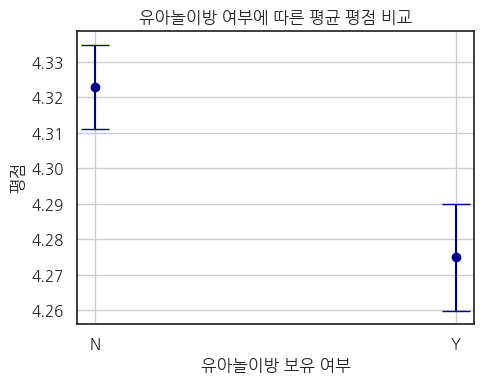

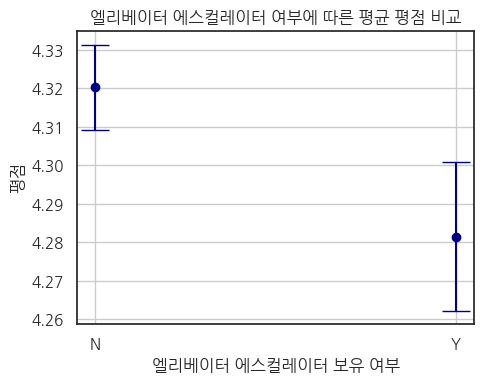

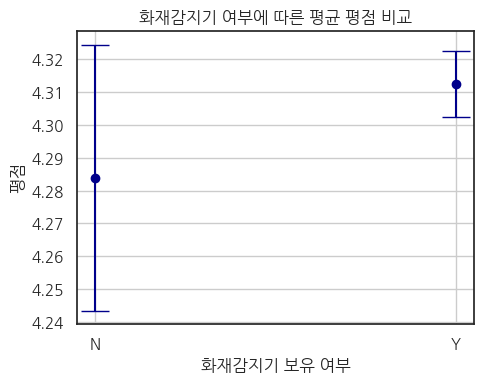

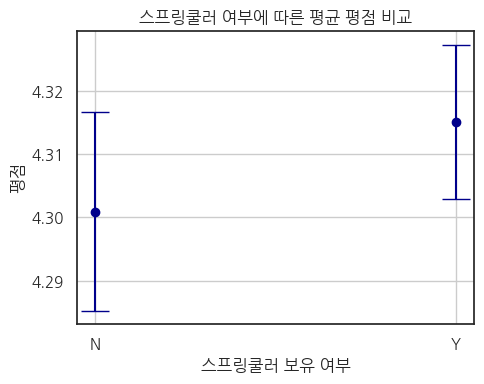

In [112]:
import matplotlib.pyplot as plt
# 'ÏãúÏû•ID'ÏôÄ 'mID' Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df_merged = pd.merge(df_info, df_rating, on='ÏãúÏû•ID', how='inner')

df_plot = df_merged.copy()

# ÌïÑÏöîÌïú Î≤îÏ£ºÌòï Î≥ÄÏàò ‚Üí Ïà´ÏûêÌòï Î≥ÄÏàòÎ°úÎèÑ ÎßåÎì§Ïñ¥ÎëêÎ©¥ ÎÇòÏ§ëÏóê ÏãúÍ∞ÅÌôîÎÇò ÌöåÍ∑ÄÏóêÎèÑ ÌôúÏö© Í∞ÄÎä•
df_plot['ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä_num'] = df_plot['ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä'].map({'Y': 1, 'N': 0})
df_plot['Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä_num'] = df_plot['Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä'].map({'Y': 1, 'N': 0})
df_plot['ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä_num'] = df_plot['ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä'].map({'Y': 1, 'N': 0})
df_plot['Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä_num'] = df_plot['Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä'].map({'Y': 1, 'N': 0})
df_plot['ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä_num'] = df_plot['ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä'].map({'Y': 1, 'N': 0})
df_plot['Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä_num'] = df_plot['Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä'].map({'Y': 1, 'N': 0})


# ÌèâÍ∑†Í≥º ÌëúÏ§ÄÏò§Ï∞® Í≥ÑÏÇ∞
def plot_mean_ci(col, title):
    group_mean = df_plot.groupby(col)['rating'].mean()
    group_sem = df_plot.groupby(col)['rating'].sem()  # ÌëúÏ§Ä Ïò§Ï∞®

    plt.figure(figsize=(5, 4))
    plt.errorbar(
        x=group_mean.index,
        y=group_mean.values,
        yerr=group_sem.values,
        fmt='o', capsize=10, color='darkblue'
    )

    plt.title(f"{title} Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÌèâÍ∑† ÌèâÏ†ê ÎπÑÍµê", fontproperties=font_prop)
    plt.xlabel(f"{title} Î≥¥Ïú† Ïó¨Î∂Ä", fontproperties=font_prop)
    plt.ylabel("ÌèâÏ†ê", fontproperties=font_prop)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ïã§Ìñâ
plot_mean_ci('ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®')
plot_mean_ci('Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïú†ÏïÑÎÜÄÏù¥Î∞©')
plot_mean_ci('ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞ ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞')
plot_mean_ci('Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä', 'Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞')
plot_mean_ci('ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä', 'ÌôîÏû¨Í∞êÏßÄÍ∏∞')
plot_mean_ci('Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä', 'Ïä§ÌîÑÎßÅÏø®Îü¨')

In [111]:
print("‚úÖ ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï® Î≥¥Ïú† Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† ÌèâÏ†ê")
print(df_plot.groupby('ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä')['rating'].agg(['mean', 'std', 'count']))

print("\n‚úÖ Ïú†ÏïÑÎÜÄÏù¥Î∞© Î≥¥Ïú† Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† ÌèâÏ†ê")
print(df_plot.groupby('Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä')['rating'].agg(['mean', 'std', 'count']))

print("\n‚úÖ ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú† Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† ÌèâÏ†ê")
print(df_plot.groupby('ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä')['rating'].agg(['mean', 'std', 'count']))

print("\n‚úÖ Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† ÌèâÏ†ê")
print(df_plot.groupby('Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä')['rating'].agg(['mean', 'std', 'count']))

‚úÖ ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï® Î≥¥Ïú† Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† ÌèâÏ†ê
                 mean       std  count
ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä                           
N            4.329904  0.197134    208
Y            4.289598  0.190408    199

‚úÖ Ïú†ÏïÑÎÜÄÏù¥Î∞© Î≥¥Ïú† Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† ÌèâÏ†ê
                mean       std  count
Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä                           
N           4.322943  0.205431    299
Y           4.274907  0.156745    108

‚úÖ ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú† Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† ÌèâÏ†ê
                mean       std  count
ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä                           
N           4.283871  0.225088     31
Y           4.312367  0.192146    376

‚úÖ Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† ÌèâÏ†ê
                 mean       std  count
Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä                           
N            4.300915  0.187435    142
Y            4.315170  0.198630    265


In [113]:
print(df_plot[['rating', 'ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä_num']].corr())
print(df_plot[['rating', 'Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä_num']].corr())

                  rating  ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä_num
rating          1.000000        0.038875
ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä_num  0.038875        1.000000
                  rating  Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä_num
rating           1.00000          0.03494
Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä_num  0.03494          1.00000


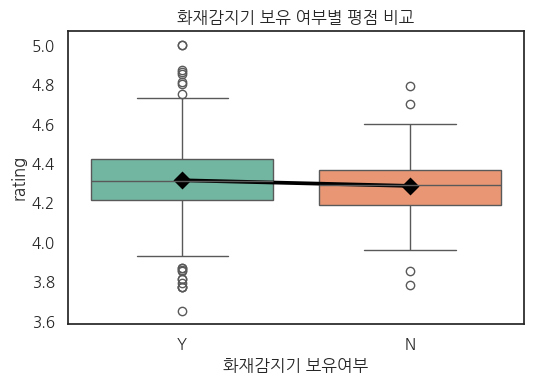

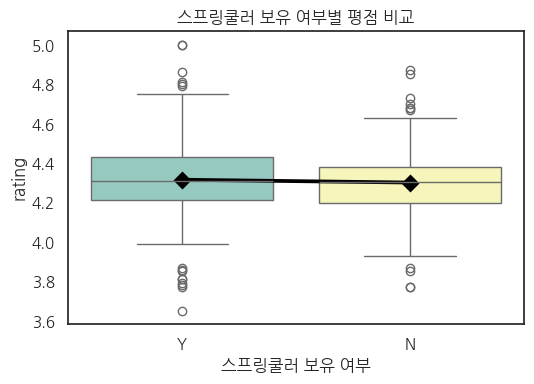

In [117]:
# ÌôîÏû¨Í∞êÏßÄÍ∏∞
plt.figure(figsize=(5.5, 4))
sns.boxplot(data=df_plot, x='ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä', y='rating', palette='Set2')
sns.pointplot(data=df_plot, x='ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä', y='rating', color='black', ci=None, markers='D')
plt.title("ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú† Ïó¨Î∂ÄÎ≥Ñ ÌèâÏ†ê ÎπÑÍµê", fontproperties=font_prop)
plt.tight_layout()
plt.show()

# Ïä§ÌîÑÎßÅÏø®Îü¨
plt.figure(figsize=(5.5, 4))
sns.boxplot(data=df_plot, x='Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä', y='rating', palette='Set3')
sns.pointplot(data=df_plot, x='Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä', y='rating', color='black', ci=None, markers='D')
plt.title("Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂ÄÎ≥Ñ ÌèâÏ†ê ÎπÑÍµê", fontproperties=font_prop)
plt.tight_layout()
plt.show()

In [118]:
df_merged['ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä'].value_counts()

ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä
Y    1093
N     203
Name: count, dtype: int64

> - ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î∞è Ïä§ÌîÑÎßÅÏø®Îü¨Ïùò Î≥¥Ïú† Ïó¨Î∂ÄÏóê Îî∞Îùº, Î≥¥Ïú† ÏãúÏû•Ïù¥ ÌèâÍ∑†Ï†ÅÏúºÎ°ú Îã§ÏÜå ÎÜíÏùÄ ÌèâÏ†êÏùÑ Î≥¥Ïù¥Îäî Í≤ΩÌñ•Ïù¥ ÎÇòÌÉÄÎÇ¨ÏúºÎÇò,
Îëê ÏßëÎã® Î™®Îëê ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä ÌÅ¨Í≥† ÏßëÎã® Í∞Ñ Ï∞®Ïù¥Ïùò Ìö®Í≥º ÌÅ¨Í∏∞Í∞Ä ÏûëÏïÑ,
ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ï∞®Ïù¥(p = 0.4983, p = 0.4745)Îäî ÌôïÏù∏ÎêòÏßÄ ÏïäÏïòÎã§.
Ïù¥Îäî ÌôîÏû¨Í∞êÏßÄÍ∏∞ÏôÄ Ïä§ÌîÑÎßÅÏø®Îü¨Ïùò Î≥¥Ïú†Í∞Ä ÏÜåÎπÑÏûê ÎßåÏ°±ÎèÑ(ÌèâÏ†ê)Ïóê ÎØ∏ÏπòÎäî ÏßÅÏ†ëÏ†Å ÏòÅÌñ•Ïù¥ Ï†úÌïúÏ†ÅÏùº Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.
> - ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï® Î≥¥Ïú† Ïó¨Î∂ÄÏóê Îî∞Îùº ÌèâÏ†ê ÌèâÍ∑†Ïùò Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏòÄÏúºÎ©∞(p = 0.0365),
Ïò§ÌûàÎ†§ Î≥¥Ïú† ÏãúÏû•ÏóêÏÑú ÌèâÍ∑† ÌèâÏ†êÏù¥ ÎÇÆÏùÄ Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÎã§.
Ïù¥Îäî ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï® ÏûêÏ≤¥Í∞Ä ÎßåÏ°±ÎèÑÎ•º ÎÅåÏñ¥Ïò¨Î¶¨Îäî ÏöîÏÜåÎùºÍ∏∞Î≥¥Îã§Îäî,
Ï†ëÍ∑ºÏÑ±Ïù¥ Îñ®Ïñ¥ÏßÄÎäî ÎåÄÌòïÏãúÏû•, ÎπÑÎèÑÏã¨ ÏãúÏû• Îì±Ïóê ÏÑ§ÏπòÎêú Í≤ΩÏö∞Í∞Ä ÎßéÏùÑ Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.
> - Ïú†ÏïÑÎÜÄÏù¥Î∞© Î≥¥Ïú† ÏãúÏû•ÏùÄ Ïò§ÌûàÎ†§ ÌèâÍ∑† ÌèâÏ†êÏù¥ ÎÇÆÏïòÏúºÎ©∞, Ïù¥ Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎèÑ Ïú†ÏùòÌïòÏòÄÎã§(p = 0.013).
Ïù¥Îäî Ïú†ÏïÑÎÜÄÏù¥Î∞©Ïù¥ ÏÑ§ÏπòÎêú ÏãúÏû•Ïù¥ Í∑úÎ™®Í∞Ä ÌÅ¨Í±∞ÎÇò, Í∏∞ÌÉÄ ÏÑúÎπÑÏä§ ÌíàÏßàÏù¥ ÎÇÆÏùÄ ÏãúÏû•Í≥º ÎèôÎ∞òÎêòÏñ¥ ÏûàÎäî Í≤ΩÏö∞Ïùº Ïàò ÏûàÏúºÎ©∞,
Îã®Ïùº ÏãúÏÑ§ÎßåÏúºÎ°úÎäî ÏÜåÎπÑÏûê ÎßåÏ°±ÎèÑÏóê Í∏çÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ Î™ªÌï† Ïàò ÏûàÏùåÏùÑ ÏùòÎØ∏ÌïúÎã§.
> - ÌïúÌé∏, Ïú†ÏïÑÎÜÄÏù¥Î∞©Í≥º ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®ÏùÄ Í∞ÅÍ∞Å p = 0.013, 0.0365Î°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú ÌèâÏ†ê Ï∞®Ïù¥Î•º ÎÇòÌÉÄÎÉàÎã§.
Í∑∏Îü¨ÎÇò ÏãúÍ∞ÅÌôî Í≤∞Í≥º, Îëê ÏãúÏÑ§ Î™®Îëê Î≥¥Ïú† Í∑∏Î£πÏóêÏÑú ÌèâÍ∑† ÌèâÏ†êÏù¥ ÎÇÆÏùÄ Í≤ΩÌñ•ÏùÑ Î≥¥Ïó¨,
Îã®Ïùº ÏãúÏÑ§ Î≥¥Ïú† ÏûêÏ≤¥Í∞Ä ÎßåÏ°±ÎèÑÎ•º ÎÅåÏñ¥Ïò¨Î¶∞Îã§Í∏∞Î≥¥Îã§, Ìï¥Îãπ ÏãúÏÑ§Ïù¥ ÏÑ§ÏπòÎêú ÏãúÏû•Ïùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÌäπÏÑ±Í≥º
Í¥ÄÎ†®Îêú Í≤∞Í≥ºÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.
Ïù¥Îäî ÏãúÏÑ§ Î≥¥Ïú† Ïó¨Î∂ÄÎ•º Îã®ÎèÖ Î≥ÄÏàòÎ°ú Î≥¥Í∏∞Î≥¥Îã§Îäî, ÏãúÏû• Ï†ÑÎ∞òÏùò Î≥µÌï©Ï†Å Ï°∞Í±¥ÏùÑ Ìï®Íªò Í≥†Î†§Ìïú Î∂ÑÏÑùÏù¥ ÌïÑÏöîÌï®ÏùÑ ÏãúÏÇ¨ÌïúÎã§.



# 4. Î¶¨Î∑∞ Ïàò ÏûêÏ≤¥ÏôÄ ÏãúÏÑ§ ÏàòÏùò Í¥ÄÍ≥Ñ
> - ÏãúÏÑ§ ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù Î¶¨Î∑∞ ÏàòÍ∞Ä ÎßéÏùÄÍ∞Ä?
> - ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Ïñ¥Îñ§ ÏãúÏÑ§Ïù¥ Î¶¨Î∑∞ ÏàòÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ ÌôïÏù∏

> - ÌöåÍ∑ÄÍ≥ÑÏàòÍ∞Ä ÌÅ¥ÏàòÎ°ù Ìï¥Îãπ ÏãúÏÑ§ÏùÑ Í∞ÄÏßÑ ÏãúÏû•ÏùºÏàòÎ°ù Î¶¨Î∑∞ ÏàòÍ∞Ä ÎßéÎã§Îäî ÏùòÎØ∏
> - R¬≤ Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù ÏãúÏÑ§ÎßåÏúºÎ°ú Î¶¨Î∑∞ ÏàòÎ•º Ïûò ÏÑ§Î™ÖÌï®
> - Ïù¥ Í≤∞Í≥ºÎ•º ÌÜµÌï¥ Ìà¨Ïûê Ïö∞ÏÑ†ÏàúÏúÑ ÎòêÎäî ÏãúÏÑ§ Í∞úÏÑ† Ï†ÑÎûµ ÏàòÎ¶Ω Í∞ÄÎä•



In [156]:
# 'ÏãúÏû•ID'ÏôÄ 'mID' Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df_merged = pd.merge(df_info, df_rating, on='ÏãúÏû•ID', how='inner')

In [157]:
print(df_merged[facility_cols].isna().sum())

ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä             0
ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä      0
Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä           0
ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä        0
Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä             0
Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä            0
ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä             0
ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä           0
Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä             0
ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä              0
Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä             0
ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä            0
Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä          0
Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä           244
dtype: int64


In [158]:
df_merged['Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä'] = df_merged['Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä'].fillna(0) # Í≥µÏ§ëÌôîÏû•Ïã§ 0ÏúºÎ°ú

In [159]:
print(df_merged[facility_cols].isna().sum())

ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä           0
ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä    0
Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä         0
ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä      0
Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä           0
Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä          0
ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä           0
ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä         0
Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä           0
ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä            0
Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä           0
ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä          0
Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä        0
Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä           0
dtype: int64


In [182]:
# ÏãúÏÑ§ Ïó¨Î∂ÄÎ•º 0/1Î°ú Î≥ÄÌôò
facility_cols = [
    'ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä', 'ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä', 'ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä',
    'Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä', 'ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä',
    'Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä',
    'Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä'
]

for col in facility_cols:
    df_info[col] = df_info[col].map({'Y': 1, 'N': 0})

# ÏãúÏû•Î≥Ñ Î¶¨Î∑∞ Ïàò Í≥ÑÏÇ∞
review_counts = df_review.groupby('mID').size().reset_index(name='Î¶¨Î∑∞Ïàò')

# Î≥ëÌï©
df_merged = pd.merge(df_info, review_counts, left_on='ÏãúÏû•ID', right_on='mID', how='inner')

# NaN Ï≤òÎ¶¨ Í≥µÏ§ëÌôîÏû•Ïã§
df_merged['Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä'] = df_merged['Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä'].fillna(0)

# ÌöåÍ∑Ä Î∂ÑÏÑù
X = df_merged[facility_cols]  # ÎèÖÎ¶Ω Î≥ÄÏàò: ÏãúÏÑ§ Î≥¥Ïú† Ïó¨Î∂Ä
y = df_merged['Î¶¨Î∑∞Ïàò']       # Ï¢ÖÏÜç Î≥ÄÏàò: Î¶¨Î∑∞ Ïàò

model = LinearRegression()
model.fit(X, y)

# ÌöåÍ∑Ä Í≤∞Í≥º Ï∂úÎ†•
coeffs = pd.Series(model.coef_, index=facility_cols).sort_values(ascending=False)
print("ÌöåÍ∑ÄÍ≥ÑÏàò (ÏãúÏÑ§Î≥Ñ ÏòÅÌñ•Î†•):\n", coeffs)
print("Ï†àÌé∏:", model.intercept_)
print("R¬≤ (ÏÑ§Î™ÖÎ†•):", model.score(X, y))

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x=coeffs.values, y=coeffs.index)
plt.title('ÏãúÏÑ§Î≥Ñ Î¶¨Î∑∞ ÏàòÏóê ÎåÄÌïú ÌöåÍ∑ÄÍ≥ÑÏàò')
plt.xlabel('ÌöåÍ∑Ä Í≥ÑÏàò (ÏòÅÌñ•Î†•)')
plt.ylabel('ÏãúÏÑ§Î™Ö')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

ÌöåÍ∑ÄÍ≥ÑÏàò (ÏãúÏÑ§Î≥Ñ ÏòÅÌñ•Î†•):
 ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä            6.862647
ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä         5.910351
Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä           5.707424
Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä           5.520948
ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä    4.277293
ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä          3.567846
ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä           3.203005
Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä           2.609086
Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä          1.380597
ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä           1.337540
Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä           0.991680
Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä         0.824913
Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä       -0.493259
ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä     -2.464408
dtype: float64
Ï†àÌé∏: 4.4786505137039025
R¬≤ (ÏÑ§Î™ÖÎ†•): 0.10152824413064432


> - Î™®Îç∏ Í∞úÏöî

  - Ï¢ÖÏÜç Î≥ÄÏàò(y): Î¶¨Î∑∞ Ïàò (Î¶¨Î∑∞Ïàò)

  - ÎèÖÎ¶Ω Î≥ÄÏàò(X): 14Í∞ú Ï†ÑÌÜµÏãúÏû• ÏãúÏÑ§Ïùò Î≥¥Ïú† Ïó¨Î∂Ä(0/1)

  - Î™®Ìòï: ÏÑ†Ìòï ÌöåÍ∑Ä (LinearRegression)

  - ÏÑ§Î™ÖÎ†• (R¬≤): 0.1015 ‚Üí ÏïΩ 10.15%

  üìå Ï¶â, Ïù¥ Î™®Îç∏ÏùÄ Ï†ÑÌÜµÏãúÏû•Ïù¥ Í∞ÄÏßÑ ÏãúÏÑ§ Ï†ïÎ≥¥ÎßåÏúºÎ°ú Î¶¨Î∑∞ ÏàòÏùò Î∂ÑÏÇ∞ ÏïΩ 10% Ï†ïÎèÑÎ•º ÏÑ§Î™ÖÌï©ÎãàÎã§.
‚Üí Í∑∏Îã§ÏßÄ ÎÜíÏùÄ ÏÑ§Î™ÖÎ†•ÏùÄ ÏïÑÎãàÎ©∞, Îã§Î•∏ ÏöîÏù∏Îì§(ÏúÑÏπò, Ïú†ÎèôÏù∏Íµ¨, ÏßÄÏó≠ Ïù∏ÏßÄÎèÑ Îì±)Ïù¥ Îçî ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.



| ÏãúÏÑ§            | Í≥ÑÏàò    | Ìï¥ÏÑù                                 |
| ------------- | ----- | ---------------------------------- |
| ÏàòÏú†ÏÑºÌÑ∞\_Î≥¥Ïú†Ïó¨Î∂Ä    | +6.86 | ÏàòÏú†ÏÑºÌÑ∞Í∞Ä ÏûàÏùÑ Í≤ΩÏö∞ Î¶¨Î∑∞ ÏàòÍ∞Ä **ÌèâÍ∑† ÏïΩ 6.9Í±¥ ÎßéÏùå** |
| ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞\_Î≥¥Ïú†Ïó¨Î∂Ä | +5.91 | ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞ Î≥¥Ïú† Ïãú Î¶¨Î∑∞ Ïàò **ÏïΩ 5.9Í±¥ Ï¶ùÍ∞Ä**    |
| Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞\_Î≥¥Ïú†Ïó¨Î∂Ä   | +5.71 | Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞ Î≥¥Ïú† Ïãú Î¶¨Î∑∞ Ïàò **ÏïΩ 5.7Í±¥ Ï¶ùÍ∞Ä**      |
| Ïú†ÏïÑÎÜÄÏù¥Î∞©\_Î≥¥Ïú†Ïó¨Î∂Ä   | +5.52 | Ïú†ÏïÑÎÜÄÏù¥Î∞© ÏûàÎäî ÏãúÏû•ÏùÄ Î¶¨Î∑∞ ÏàòÍ∞Ä **ÏïΩ 5.5Í±¥ Ï¶ùÍ∞Ä**   |
| ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞\_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞ | +4.28 | **Ï†ëÍ∑ºÏÑ± Ìñ•ÏÉÅ**Ïù¥ Î¶¨Î∑∞ Ïàò Ï¶ùÍ∞ÄÏóê Í∏∞Ïó¨ Í∞ÄÎä•         |

- Ïù¥Ï≤òÎüº ÏïàÏ†Ñ¬∑Î≥¥Ïú°¬∑Ìé∏Ïùò ÏãúÏÑ§Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Î¶¨Î∑∞ Ïú†ÎèÑÏóê Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ Ï£ºÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏäµÎãàÎã§.


| ÏãúÏÑ§       | Í≥ÑÏàò        | Ìï¥ÏÑù                                   |
| -------- | --------- | ------------------------------------ |
| Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞ | -0.49     | Í±∞Ïùò ÏòÅÌñ• ÏóÜÏùåÏóê Í∞ÄÍπåÏõÄ                        |
| Í≥†Í∞ùÏ£ºÏ∞®Ïû•    | **-2.46** | Ï£ºÏ∞®Ïû•Ïù¥ ÏûàÎäî ÏãúÏû•ÏùºÏàòÎ°ù Î¶¨Î∑∞ ÏàòÍ∞Ä **ÌèâÍ∑† 2.5Í±¥ Îçî Ï†ÅÏùå** |

- üí° Í≥†Í∞ùÏ£ºÏ∞®Ïû•Ïù¥ ÏùåÏùò Í≥ÑÏàòÎ•º Í∞ÄÏßÄÎäî Ïù¥Ïú†Îäî:

  - ÎåÄÌòï Ï†ÑÌÜµÏãúÏû•Ïù¥ Ïò§ÌûàÎ†§ Î¶¨Î∑∞ Ïú†ÎèÑÏóê Ï†ÅÍ∑πÏ†ÅÏù¥ÏßÄ ÏïäÏùÑ Ïàò ÏûàÏùå

  - ÎòêÎäî Î¶¨Î∑∞Î•º Ïì∞Îäî Î∞©Î¨∏Í∞ùÎì§Ïù¥ ÎåÄÏ§ëÍµêÌÜµ Ï§ëÏã¨Ïùº Í∞ÄÎä•ÏÑ±





> - Ï†àÌé∏Ìï¥ÏÑù

   - Ï†àÌé∏ = 4.48:
   - ‚Üí Î™®Îì† ÏãúÏÑ§Ïù¥ ÏóÜÏùÑ Í≤ΩÏö∞(0)ÏóêÎèÑ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÌèâÍ∑† Î¶¨Î∑∞ ÏàòÎäî ÏïΩ 4.5Í±¥Ïù¥ÎùºÎäî ÏùòÎØ∏.



# 5. Î¶¨Î∑∞ ÌèâÏ†êÍ≥º ÏãúÏÑ§Í≥ºÏùò Í¥ÄÍ≥Ñ

In [226]:
# for col in facility_cols:
#     df_info[col] = df_info[col].map({'Y': 1, 'N': 0})

# # df_rating: ['ÏãúÏû•ID', 'rating'] Ìè¨Ìï®Îêú DataFrameÏù¥ÎùºÍ≥† Í∞ÄÏ†ï
# df_rating['rating'] = pd.to_numeric(df_rating['rating'], errors='coerce')  # ÌòπÏãú Î™®Î•º Î¨∏ÏûêÌòï Î≥ÄÌôò

# # Î≥ëÌï©: 'ÏãúÏû•ID' Í∏∞Ï§Ä
# df_merged = pd.merge(df_info, df_rating[['ÏãúÏû•ID', 'rating']], on='ÏãúÏû•ID', how='inner')

# Í≥µÏ§ëÌôîÏû•Ïã§
df_merged['Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä'] = df_merged['Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä'].fillna(0)

# NaN Ï†úÍ±∞ (ÌòπÏãú ÏûàÏùÑ Í≤ΩÏö∞)
df_merged = df_merged.dropna(subset=['rating'])

# ÌöåÍ∑Ä Î∂ÑÏÑù
X = df_merged[facility_cols]  # ÎèÖÎ¶Ω Î≥ÄÏàò: ÏãúÏÑ§ Î≥¥Ïú† Ïó¨Î∂Ä
y = df_merged['rating']       # Ï¢ÖÏÜç Î≥ÄÏàò: Î¶¨Î∑∞ ÌèâÏ†ê

model = LinearRegression()
model.fit(X, y)

# ÌöåÍ∑Ä Í≤∞Í≥º Ï∂úÎ†•
coeffs = pd.Series(model.coef_, index=facility_cols).sort_values(ascending=False)
print("ÌöåÍ∑ÄÍ≥ÑÏàò (ÏãúÏÑ§Î≥Ñ ÌèâÏ†ê ÏòÅÌñ•Î†•):\n", coeffs)
print("Ï†àÌé∏:", model.intercept_)
print("R¬≤ (ÏÑ§Î™ÖÎ†•):", model.score(X, y))

ÌöåÍ∑ÄÍ≥ÑÏàò (ÏãúÏÑ§Î≥Ñ ÌèâÏ†ê ÏòÅÌñ•Î†•):
 ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä           0.052977
Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä          0.030991
Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä           0.028003
ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä            0.015972
Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä           0.012932
ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä      0.006968
Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä           0.004342
Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä        0.001812
ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä        -0.013213
Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä        -0.024118
ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä         -0.031707
Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä          -0.048260
ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä          -0.048736
ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä   -0.056169
dtype: float64
Ï†àÌé∏: 4.310958509184547
R¬≤ (ÏÑ§Î™ÖÎ†•): 0.05091123009454235


# 6. ÏßÄÏó≠ Î≥Ñ ÏãúÏû• Í∞úÏàò ÏãúÍ∞ÅÌôî

In [14]:
df_info.columns

Index(['ÏãúÏû•ID', 'ÏãúÏû•Î™Ö', 'ÎèÑÎ°úÎ™ÖÏ£ºÏÜå', 'ÏãúÎèÑ', 'ÏãúÍµ∞Íµ¨', 'ÏïÑÏºÄÏù¥Îìú Î≥¥Ïú† Ïó¨Î∂Ä', 'ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞_ÏóêÏä§Ïª¨Î†àÏù¥ÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä',
       'Í≥†Í∞ùÏßÄÏõêÏÑºÌÑ∞ Î≥¥Ïú† Ïó¨Î∂Ä', 'ÏãúÏû•Ï†ÑÏö© Í≥†Í∞ùÏ£ºÏ∞®Ïû•_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ï¢ÖÌï©ÏΩúÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïä§ÌîÑÎßÅÏø®Îü¨ Î≥¥Ïú† Ïó¨Î∂Ä',
       'ÌôîÏû¨Í∞êÏßÄÍ∏∞ Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏûêÎèôÏã¨Ïû•Ï∂©Í≤©Í∏∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïú†ÏïÑÎÜÄÏù¥Î∞©_Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏàòÏú†ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'Î¨ºÌíàÎ≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä',
       'ÏûêÏ†ÑÍ±∞Î≥¥Í¥ÄÌï®_Î≥¥Ïú†Ïó¨Î∂Ä', 'Ïô∏Íµ≠Ïù∏ ÏïàÎÇ¥ÏÑºÌÑ∞_Î≥¥Ïú†Ïó¨Î∂Ä', 'ÏãúÏû•Ïú†Ìòï', 'ÏãúÏû•Í∞úÏÑ§Ï£ºÍ∏∞', 'Ï†êÌè¨Ïàò', 'Í≥µÏ§ëÌôîÏû•Ïã§ Î≥¥Ïú†Ïó¨Î∂Ä',
       'ÏÇ¨Ïö©Í∞ÄÎä•ÏÉÅÌíàÍ∂å'],
      dtype='object')

In [15]:
import json
import folium
import pandas as pd

# ‚ë† ÏãúÎèÑÎ≥Ñ ÏãúÏû• Ïàò ÏßëÍ≥Ñ
counts = df_info.groupby('ÏãúÎèÑ').size().reset_index(name='count')

sido_geojson_path = '/content/drive/MyDrive/1_public/markets_data/skorea-provinces-2018-geo.json'

# ‚ë° GeoJSON Î°úÎìú
with open(sido_geojson_path, 'r', encoding='utf-8') as f:
    geo = json.load(f)

# ‚ë¢ Folium Îßµ ÏÉùÏÑ±
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# Choropleth Ï∂îÍ∞Ä
folium.Choropleth(
    geo_data=geo,
    name='choropleth',
    data=counts,
    columns=['ÏãúÎèÑ', 'count'],
    key_on='feature.properties.name',  # GeoJSON ÏÉÅ 'name' ÏÜçÏÑ±Ïóê ÏãúÎèÑÎ™Ö ÎåÄÏùë
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='ÏãúÏû• Ïàò(Í∞ú)'
).add_to(m)

folium.LayerControl().add_to(m)

m.save('market_count_by_sido.html')
m

Output hidden; open in https://colab.research.google.com to view.

In [20]:
import json
import folium
import pandas as pd

# ‚ë† ÏãúÎèÑÎ≥Ñ ÏãúÏû• Ïàò ÏßëÍ≥Ñ
counts = df_info.groupby('ÏãúÎèÑ').size().reset_index(name='count')

# ‚ë° GeoJSON ÌååÏùº Í≤ΩÎ°ú
sido_geojson_path = '/content/drive/MyDrive/1_public/markets_data/skorea-provinces-2018-geo.json'

# ‚ë¢ GeoJSON Î°úÎìú
with open(sido_geojson_path, 'r', encoding='utf-8') as f:
    geo = json.load(f)

# ‚ë£ Folium ÏßÄÎèÑ ÏÉùÏÑ±
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# ‚ë§ ÌûàÌä∏Îßµ Ïä§ÌÉÄÏùº Choropleth Ï∂îÍ∞Ä
folium.Choropleth(
    geo_data=geo,
    name='choropleth',
    data=counts,
    columns=['ÏãúÎèÑ', 'count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',  # ÌûàÌä∏Îßµ ÎäêÎÇå ÏÉâÏÉÅ
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name='ÏãúÏû• Ïàò(Í∞ú)'
).add_to(m)

folium.LayerControl().add_to(m)

# ‚ë• ÏßÄÎèÑ Ï†ÄÏû• Î∞è ÌëúÏãú
m.save('market_heatmap_style.html')
m

Output hidden; open in https://colab.research.google.com to view.

# 7. "ÏÇ¨Ïö©Í∞ÄÎä• ÏÉÅÌíàÍ∂å"Ïù¥ÎùºÎäî Î≥ÄÏàòÏôÄ ÎßåÏ°±ÎèÑ(=ÌèâÏ†ê) ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥ÑÎäî Îã®Ïàú ÏÉÅÍ¥Ä Î∂ÑÏÑùÏù¥ÎÇò Îëê ÏßëÎã® ÌèâÍ∑† ÎπÑÍµê(Ïòà: t-test), ÎòêÎäî Î¶¨Î∑∞ ÎÇ¥ ÌÇ§ÏõåÎìú ÎπàÎèÑ Î∂ÑÏÑù
> - ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Í∞ÄÎä• ÏãúÏû• vs Î∂àÍ∞ÄÎä• ÏãúÏû• Í∞Ñ ÌèâÏ†ê(Î¶¨Î∑∞ rating) ÌèâÍ∑† Ï∞®Ïù¥

> - ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏûàÎäîÍ∞Ä? ‚Üí t-test



In [234]:
df_merged['ÏÇ¨Ïö©Í∞ÄÎä•ÏÉÅÌíàÍ∂å'] = df_merged['ÏÇ¨Ïö©Í∞ÄÎä•ÏÉÅÌíàÍ∂å'].fillna(0)

In [239]:
from scipy.stats import ttest_ind

# ÏÉÅÌíàÍ∂å Í∞ÄÎä• Ïó¨Î∂ÄÎ•º 1/0ÏúºÎ°ú Î≥ÄÌôò
df_merged['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©'] = df_merged['ÏÇ¨Ïö©Í∞ÄÎä•ÏÉÅÌíàÍ∂å'].map({'Ïò®ÎàÑÎ¶¨ÏÉÅÌíàÍ∂å': 1, 0 : 0})

# Í∞Å Í∑∏Î£πÏùò ÌèâÏ†ê
rating_yes = df_merged[df_merged['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©'] == 1]['rating'].dropna().astype(float)
rating_no  = df_merged[df_merged['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©'] == 0]['rating'].dropna().astype(float)

# ÌèâÍ∑† ÎπÑÍµê
print(f"‚úÖ ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Í∞ÄÎä• ÏãúÏû• ÌèâÍ∑† ÌèâÏ†ê: {rating_yes.mean():.2f}")
print(f"‚ùå ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Î∂àÍ∞Ä ÏãúÏû• ÌèâÍ∑† ÌèâÏ†ê: {rating_no.mean():.2f}")

# t-test
t_stat, p_val = ttest_ind(rating_yes, rating_no, equal_var=False)
print(f"üìä T-test Í≤∞Í≥º: t={t_stat:.3f}, p={p_val:.4f}")

# if p_val < 0.05:
#     print("-> Îëê ÏßëÎã® Í∞ÑÏùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌï©ÎãàÎã§.")
# else:
#     print("-> Îëê ÏßëÎã® Í∞ÑÏùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Îäî Ïú†ÏùòÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

‚úÖ ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Í∞ÄÎä• ÏãúÏû• ÌèâÍ∑† ÌèâÏ†ê: 4.32
‚ùå ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Î∂àÍ∞Ä ÏãúÏû• ÌèâÍ∑† ÌèâÏ†ê: 4.28
üìä T-test Í≤∞Í≥º: t=1.704, p=0.0903


> - "ÌèâÍ∑† ÌèâÏ†êÏùÄ ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Í∞ÄÎä• ÏãúÏû•Ïù¥ ÏÜåÌè≠ ÎÜíÏùÄ Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÏúºÎ©∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎäî Ïú†ÏùòÌïòÏßÄ ÏïäÏïòÏßÄÎßå (p=0.090), ÏïΩÌïú ÏàòÏ§ÄÏùò Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï† Í∞ÄÎä•ÏÑ±ÎèÑ Î∞∞Ï†úÌï† Ïàò ÏóÜÎã§. Î≥¥Îã§ Î™ÖÌôïÌïú Í≤∞Î°†ÏùÑ ÏúÑÌï¥ Ï∂îÍ∞ÄÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÌôïÎ≥¥ÎÇò Î≥¥Ï°∞ Î≥ÄÏàò ÌÜµÏ†úÍ∞Ä ÌïÑÏöîÌïòÎã§."



In [242]:
# ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Ïó¨Î∂ÄÎ•º Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
df_plot['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©Ïó¨Î∂Ä'] = df_plot['ÏÇ¨Ïö©Í∞ÄÎä•ÏÉÅÌíàÍ∂å'].apply(lambda x: 1 if x == 'Ïò®ÎàÑÎ¶¨ÏÉÅÌíàÍ∂å' else 0)
df_plot['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©Ïó¨Î∂Ä_ÎùºÎ≤®'] = df_plot['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©Ïó¨Î∂Ä'].map({1: 'ÏÇ¨Ïö© Í∞ÄÎä•', 0: 'ÏÇ¨Ïö© Î∂àÍ∞Ä'})

# ÌïúÍ∏Ä Ìè∞Ìä∏ Îì±Î°ù
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ÏÉÅÌíàÍ∂å Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÏãúÍ∞ÅÌôî
def plot_mean_ci_v2(col, title):
    group_mean = df_plot.groupby(col)['rating'].mean()
    group_sem = df_plot.groupby(col)['rating'].sem()

    plt.figure(figsize=(5, 4))
    plt.errorbar(
        x=group_mean.index,
        y=group_mean.values,
        yerr=group_sem.values,
        fmt='o', capsize=10, color='teal'
    )
    plt.title(f"{title}Ïóê Îî∞Î•∏ ÌèâÍ∑† ÌèâÏ†ê ÎπÑÍµê", fontproperties=font_prop)
    plt.xlabel(title, fontproperties=font_prop)
    plt.ylabel("ÌèâÏ†ê", fontproperties=font_prop)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ïã§Ìñâ
plot_mean_ci_v2('ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©Ïó¨Î∂Ä_ÎùºÎ≤®', 'ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Ïó¨Î∂Ä')

In [247]:
# Î¶¨Î∑∞ Ïª¨ÎüºÍπåÏßÄ Ìè¨Ìï®Ìï¥ÏÑú Î≥ëÌï©
df_merged = pd.merge(
    df_info,
    df_review[['mID', 'rate', 'review']],
    left_on='ÏãúÏû•ID',
    right_on='mID',
    how='inner'
)

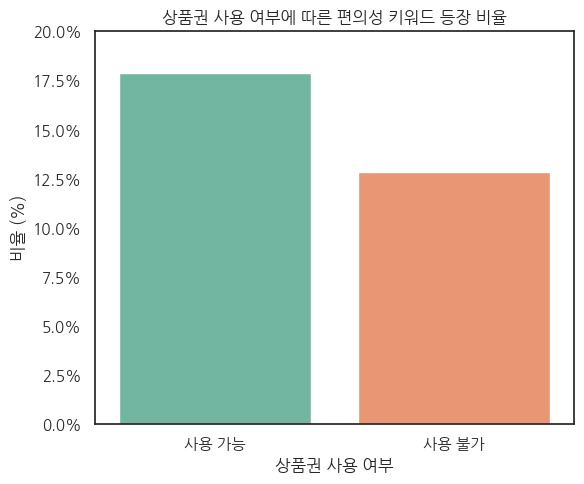

In [281]:
import matplotlib.ticker as mtick

# Ìé∏ÏùòÏÑ± Í¥ÄÎ†® ÌÇ§ÏõåÎìú
keywords = [
    'Ìé∏Î¶¨', 'Ìé∏Ìï¥', 'Ìé∏ÌïòÍ≤å', 'Í∞ÑÌé∏', 'Í∞ÑÎã®', 'Ïâ¨Ïõå', 'ÏâΩÍ≤å', 'Îπ†Î•¥Í≤å', 'ÏàòÏõî',
    'Í≤∞Ï†ú', 'ÌòÑÍ∏à', 'Ïπ¥Îìú', 'QR', 'ÏÉÅÌíàÍ∂å', 'Ïù¥Ïö©', 'Ï†ëÍ∑º', 'Ï£ºÏ∞®',
    'Í∞ÄÍπù', 'Í∑ºÏ≤ò', 'Ï∞æÍ∏∞ Ïâ¨ÏõÄ', 'Ï†ëÍ∑ºÏÑ±', 'ÌôòÏäπ', 'ÍµêÌÜµ'
]

def has_convenience_word(text):
    if pd.isna(text): return False
    return any(keyword in text for keyword in keywords)

# 2. Ìé∏ÏùòÏÑ± ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä ÌååÏïÖ
df_merged['Ìé∏ÏùòÏÑ±_ÌÇ§ÏõåÎìú'] = df_merged['review'].apply(has_convenience_word)

# 3. ÏÉÅÌíàÍ∂å Ïó¨Î∂Ä Ï≤òÎ¶¨ (NaNÏùÄ 'ÏÇ¨Ïö© Î∂àÍ∞Ä'Î°ú Í∞ÑÏ£º)
df_merged['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©'] = df_merged['ÏÇ¨Ïö©Í∞ÄÎä•ÏÉÅÌíàÍ∂å'].apply(lambda x: 'ÏÇ¨Ïö© Í∞ÄÎä•' if x == 'Ïò®ÎàÑÎ¶¨ÏÉÅÌíàÍ∂å' else 'ÏÇ¨Ïö© Î∂àÍ∞Ä')

# 4. ÏßëÍ≥Ñ
result = df_merged.groupby('ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©')['Ìé∏ÏùòÏÑ±_ÌÇ§ÏõåÎìú'].mean().reset_index()

# 5. ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.barplot(
    data=result,
    x='ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©',
    y='Ìé∏ÏùòÏÑ±_ÌÇ§ÏõåÎìú',
    order=['ÏÇ¨Ïö© Í∞ÄÎä•', 'ÏÇ¨Ïö© Î∂àÍ∞Ä'],  # ÏãúÍ∞ÅÌôî ÏàúÏÑú Í≥†Ï†ï
    palette='Set2'
)

plt.title('ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ìé∏ÏùòÏÑ± ÌÇ§ÏõåÎìú Îì±Ïû• ÎπÑÏú®')
plt.ylabel('ÎπÑÏú® (%)')
plt.xlabel('ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Ïó¨Î∂Ä')
plt.ylim(0, 0.2)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # ÏÜåÏàò ‚Üí ÌçºÏÑºÌä∏
# plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

- ÌôïÏû•Îêú ÌÇ§ÏõåÎìúÏóêÎäî 'Í≤∞Ï†ú', 'Ïπ¥Îìú', 'QR', 'Ï†ëÍ∑ºÏÑ±', 'Ï£ºÏ∞®', 'Í∞ÄÍπù' Îì±
‚Üí Ïã§Ï†ú Ïù¥Ïö©ÏûêÏùò ‚ÄòÌé∏ÏùòÏÑ±‚Äô Ï≤¥Í∞êÍ≥º ÏßÅÍ≤∞ÎêòÎäî ÌëúÌòÑÎì§Ïù¥ Ìè¨Ìï®Îê®

- ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Í∞ÄÎä• ÏãúÏû•ÏóêÏÑú Ïù¥ ÌÇ§ÏõåÎìúÎì§Ïùò Îì±Ïû• ÎπÑÏú®Ïù¥ ÎÜíÎã§Îäî Í±¥:

- ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Í∞ÄÎä•ÏÑ± ÏûêÏ≤¥Í∞Ä Î¶¨Î∑∞ÏóêÏÑú Ìé∏ÏùòÏÑ±Í≥º Ìï®Íªò Ïñ∏Í∏âÎêòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå
‚Üí Ï¶â, ÏÇ¨Ïö©ÏûêÎì§ÏùÄ ÏÉÅÌíàÍ∂å ÏÇ¨Ïö©ÏùÑ Ìé∏Î¶¨Ìï®Ïùò ÏùºÎ∂ÄÎ°ú Ïù∏ÏãùÌïòÍ≥† ÏûàÎã§Îäî Ï¶ùÍ±∞Í∞Ä Îê† Ïàò ÏûàÏäµÎãàÎã§.

> - Î¶¨Î∑∞ ÎÇ¥ Ìé∏ÏùòÏÑ± Í¥ÄÎ†® ÌÇ§ÏõåÎìú Î∂ÑÏÑù Í≤∞Í≥º, ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Í∞ÄÎä• ÏãúÏû•ÏóêÏÑú Ìï¥Îãπ ÌÇ§ÏõåÎìúÏùò Îì±Ïû• ÎπÑÏú®Ïù¥ Îçî ÎÜíÍ≤å ÎÇòÌÉÄÎÇ¨Îã§.
Ïù¥Îäî ÏÉÅÌíàÍ∂å ÏÇ¨Ïö©Ïù¥ ÏãúÏû• Ïù¥Ïö©Ïùò Ìé∏ÏùòÏÑ±Í≥º Ïó∞Í≤∞ÎêòÏñ¥ ÏÜåÎπÑÏûê Í≤ΩÌóòÏóê Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.


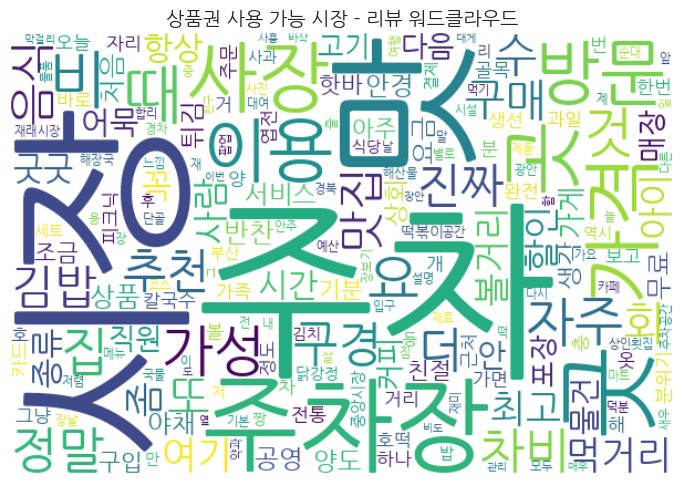

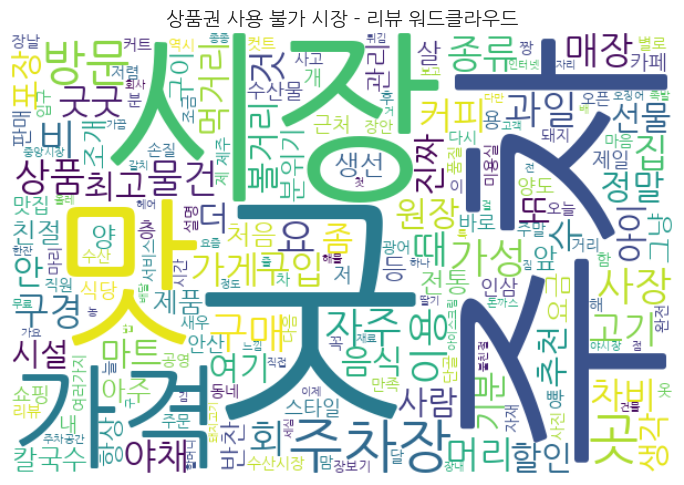

In [283]:
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï§ÄÎπÑ
okt = Okt()

# ÌÖçÏä§Ìä∏ Ï†ïÎ¶¨ Ìï®Ïàò
def get_nouns(texts):
    all_nouns = []
    for text in texts.dropna():
        nouns = okt.nouns(text)
        all_nouns += nouns
    return all_nouns

# ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Ïó¨Î∂Ä Î∂ÑÎ•ò
df_merged['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©'] = df_merged['ÏÇ¨Ïö©Í∞ÄÎä•ÏÉÅÌíàÍ∂å'].apply(lambda x: 'ÏÇ¨Ïö© Í∞ÄÎä•' if x == 'Ïò®ÎàÑÎ¶¨ÏÉÅÌíàÍ∂å' else 'ÏÇ¨Ïö© Î∂àÍ∞Ä')

# Í∞Å Í∑∏Î£πÎ≥Ñ Î¶¨Î∑∞ Î™®Ïùå
reviews_yes = df_merged[df_merged['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©'] == 'ÏÇ¨Ïö© Í∞ÄÎä•']['review']
reviews_no  = df_merged[df_merged['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©'] == 'ÏÇ¨Ïö© Î∂àÍ∞Ä']['review']

# Îã®Ïñ¥ Ï∂îÏ∂ú
nouns_yes = get_nouns(reviews_yes)
nouns_no  = get_nouns(reviews_no)

# ÎπàÎèÑÏàò Í≥ÑÏÇ∞
from collections import Counter
freq_yes = Counter(nouns_yes)
freq_no  = Counter(nouns_no)

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± Ìï®Ïàò
def draw_wordcloud(freq, title):
    wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # Í≤ΩÎ°úÎäî ÏãúÏä§ÌÖúÏóê Îî∞Îùº Ï°∞Ï†ï
                   background_color='white',
                   width=600, height=400).generate_from_frequencies(freq)

    plt.figure(figsize=(7, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# ÏãúÍ∞ÅÌôî Ïã§Ìñâ
draw_wordcloud(freq_yes, 'ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Í∞ÄÎä• ÏãúÏû• - Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')
draw_wordcloud(freq_no,  'ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Î∂àÍ∞Ä ÏãúÏû• - Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')

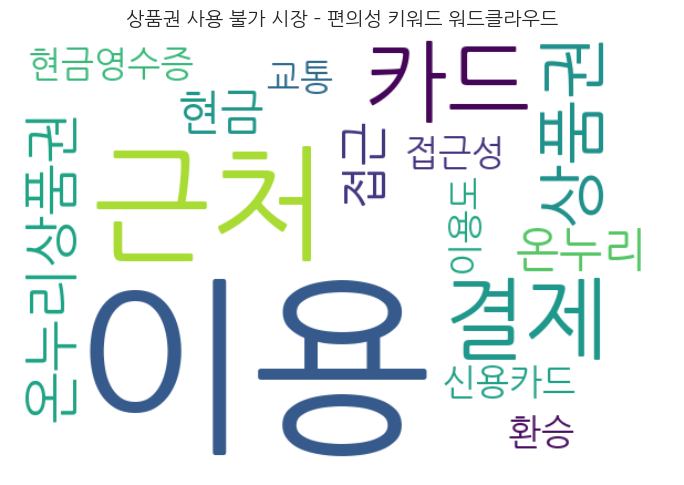

In [287]:
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from collections import Counter

# Ìé∏ÏùòÏÑ± ÌÇ§ÏõåÎìú ÏÇ¨Ï†Ñ
keywords = [
    # 'Ìé∏Î¶¨', 'Ìé∏Ìï¥', 'Ìé∏ÌïòÍ≤å', 'Ïò®ÎàÑÎ¶¨', 'Í∞ÑÌé∏', 'Í∞ÑÎã®', 'Ïâ¨Ïõå', 'ÏâΩÍ≤å', 'Îπ†Î•¥Í≤å', 'ÏàòÏõî',
    'Ïò®ÎàÑÎ¶¨', 'ÏÉÅÌíàÍ∂å', 'Í∞ÑÌé∏', 'Í∞ÑÎã®', 'Ïâ¨Ïõå', 'ÏâΩÍ≤å', 'Îπ†Î•¥Í≤å', 'ÏàòÏõî',
    'Í≤∞Ï†ú', 'ÌòÑÍ∏à', 'Ïπ¥Îìú', 'QR', 'Ïù¥Ïö©', 'Ï†ëÍ∑º',
    'Í∞ÄÍπù', 'Í∑ºÏ≤ò', 'Ï∞æÍ∏∞ Ïâ¨ÏõÄ', 'Ï†ëÍ∑ºÏÑ±', 'ÌôòÏäπ', 'ÍµêÌÜµ'
]

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
okt = Okt()

# Ìé∏ÏùòÏÑ± ÌÇ§ÏõåÎìúÎßå Ï∂îÏ∂ú
def extract_convenience_nouns(texts):
    filtered = []
    for text in texts.dropna():
        nouns = okt.nouns(text)
        for n in nouns:
            if any(k in n for k in keywords):
                filtered.append(n)
    return filtered

# Í∑∏Î£πÎ≥Ñ Î¶¨Î∑∞ ÌÖçÏä§Ìä∏
reviews_yes = df_merged[df_merged['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©'] == 'ÏÇ¨Ïö© Í∞ÄÎä•']['review']
reviews_no  = df_merged[df_merged['ÏÉÅÌíàÍ∂å_ÏÇ¨Ïö©'] == 'ÏÇ¨Ïö© Î∂àÍ∞Ä']['review']

# ÌÇ§ÏõåÎìú ÌïÑÌÑ∞ÎßÅ ÌõÑ Îã®Ïñ¥ Ïàò Ïπ¥Ïö¥ÌåÖ
freq_yes = Counter(extract_convenience_nouns(reviews_yes))
freq_no  = Counter(extract_convenience_nouns(reviews_no))

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Ìï®Ïàò
def draw_wordcloud(freq, title):
    wc = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
        background_color='white',
        width=600, height=400
    ).generate_from_frequencies(freq)

    plt.figure(figsize=(7, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# ÏãúÍ∞ÅÌôî
draw_wordcloud(freq_yes, 'ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Í∞ÄÎä• ÏãúÏû• ‚Äì Ìé∏ÏùòÏÑ± ÌÇ§ÏõåÎìú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')
draw_wordcloud(freq_no,  'ÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Î∂àÍ∞Ä ÏãúÏû• ‚Äì Ìé∏ÏùòÏÑ± ÌÇ§ÏõåÎìú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')